# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [159]:
# Import the modules
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [160]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv(
    Path("./Resources/lending_data.csv")
)

# Review the DataFrame
print("lending_data.csv file read into DataFrame:")
display(lending_data_df.head())

lending_data.csv file read into DataFrame:


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [161]:
# Separate the data into labels and features

# Separate the y variable, the labels
y_srs = lending_data_df['loan_status']

# Separate the X variable, the features
X_df = lending_data_df.drop(columns='loan_status')

In [162]:
# Review the y variable Series
print("Target set to be used for ML models: loan_status")
display(type(y_srs))
display(y_srs)

Target set to be used for ML models: loan_status


pandas.core.series.Series

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [163]:
# Review the X variable DataFrame
print("Feature set DataFrame be used for ML models")
display(type(X_df))
display(X_df)

Feature set DataFrame be used for ML models


pandas.core.frame.DataFrame

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [164]:
# Check the balance of our target values
print("# of loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_srs.value_counts())

# of loan_status values that =0 (loan approved) and =1 (loan rejected)


0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [165]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)

In [166]:
# Data checkpoint
print("# of loan_status values that =0 (loan approved) and =1 (loan rejected) in the Training Set")
display(y_train_srs.value_counts())
print("# of loan_status values that =0 (loan approved) and =1 (loan rejected) in the Target/Test Set")
display(y_test_srs.value_counts())

# of loan_status values that =0 (loan approved) and =1 (loan rejected) in the Training Set


0    56271
1     1881
Name: loan_status, dtype: int64

# of loan_status values that =0 (loan approved) and =1 (loan rejected) in the Target/Test Set


0    18765
1      619
Name: loan_status, dtype: int64

---

## Create Regression Models with the Original Data

###  Step 1a: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [167]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg_model = LogisticRegression(random_state=1)

# Fit the model using training data
logreg_model.fit(X_train_df, y_train_srs)

LogisticRegression(random_state=1)

###  Step 1b: Fit a Support Vector Machine model by using the training data (`X_train` and `y_train`).

In [168]:
#### svm_model = SVC(kernel='linear')
#### 
#### # Fit the data
#### svm_model.fit(X_train_df, y_train_srs)

###  Step 1c: Fit a Decision Tree model by using the training data (`X_train` and `y_train`).

In [169]:
# Creating the decision tree classifier instance
dectree_model = tree.DecisionTreeClassifier(random_state=1)

# Fitting the model
dectree_model = dectree_model.fit(X_train_df, y_train_srs)

###  Step 1d: Fit a Random Forest model by using the training data (`X_train` and `y_train`).

In [170]:
# Create a random forest classifier
rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rndfor_model = rndfor_model.fit(X_train_df, y_train_srs)

###  Step 1e: Fit a KNN model by using the training data (`X_train` and `y_train`).

In [171]:
# Instantiate the model with k = 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train_df, y_train_srs)

KNeighborsClassifier(n_neighbors=3)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [172]:
# Make a prediction using the testing data on the logistics Regression model
logreg_y_pred_npa = logreg_model.predict(X_test_df)

#### # Make a prediction using the testing data on the Support Vector Matrix model
#### svm_y_pred_npa = svm_model.predict(X_test_df)

# Make a prediction using the testing data on the Decision Tree model
dectree_y_pred_npa = dectree_model.predict(X_test_df)

# Make a prediction using the testing data on the Random Forest model
rndfor_y_pred_npa = rndfor_model.predict(X_test_df)

# Make a prediction using the testing data on the KNN model
knn_y_pred_npa = knn_model.predict(X_test_df)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [173]:
print("Balanced Accuracy Scores:")
print("-------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))


Balanced Accuracy Scores:
-------------------------
Logistic Regression:                   0.9520479254722232
Decision Tree:                         0.9238831013810385
Random Forest:                         0.9440503170968879
KNN:                                   0.9616077520320846


In [174]:
# Print confusion matrix
def confusion_matrix_sklearn(y_test, y_pred, plt_title):
    """
    To plot the confusion_matrix with percentages
    prediction:  predicted values
    original:    original values
    """
    cm = confusion_matrix(y_test, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(plt_title)

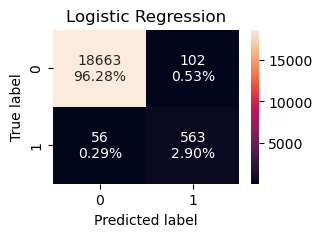

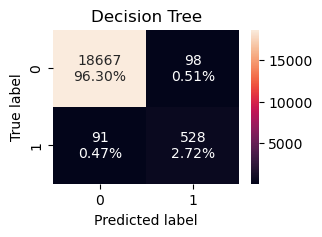

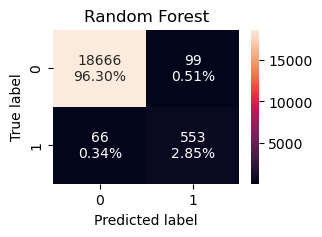

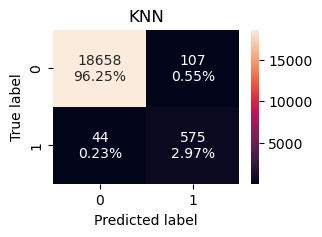

In [175]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN")

In [176]:
# Print the classification report for the Logistics Regression model
logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)

#### # Print the classification report for the SVM model
#### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)

# Print the classification report for the Decision Tree model
dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)

# Print the classification report for the Random Forest model
rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)

# Print the classification report for the KNN model
knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)

In [177]:
print("Logistic Regression Classification Report:\n", logreg_class_rpt)
####print("SVM Classification Report:\n", svm_class_rpt)
print("Decision Tree Classification Report:\n", dectree_class_rpt)
print("Random Forest Classification Report:\n", rndfor_class_rpt)
print("KNN Classification Report:\n", knn_class_rpt)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.84      0.85      0.85       619

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.89      0.87       619

    accuracy                           0.99     19384
   macro

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** \
- Logistics regression classification report analysis:\
-- "accuracy = 0.99".  The model predicted correctly 99% of the time that the loan was either healhty loan or a high risk loan\
-- "precision /0 (healthy loan) = 1.00".  Out of all the loans the model predicted would be a healthy loan (0), the model predicted this correctly 100% of the time\
-- "precision /1 (high-risk loan) = 0.84".  Out of all the loans the model predicted would be a high-risk loan (1), the model predicted this correctly 84% of the time\
-- "recall /0 (healthy loan) = 0.99".  Out of all the loans that were declared a healthy loan, the model predicted this outcome 99% of the time\
-- "recall /1 (high-risk loan) = 0.85".  Out of all the loans that were declared a high-risk loan, the model predicted this outcome 85% of the time

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1a: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [178]:
# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_rndovr_df, y_train_rndovr_srs = random_oversampler.fit_resample(X_train_df, y_train_srs)

In [179]:
# Count the distinct values of the resampled labels data
print("# of random over sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_rndovr_srs.value_counts())

# of random over sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2a-a: Use the `LogisticRegression` classifier and the oversampled resampled data to fit the model and make predictions.

In [180]:
# Instantiate the model
logreg_rndovr_model = LogisticRegression(random_state=1)

# Fit the model using the rndovr training data
logreg_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
logreg_y_pred_rndovr_npa = logreg_rndovr_model.predict(X_test_df)

### Step 2a-b: Use the `SVM` classifier and the oversampled resampled data to fit the model and make predictions.

#### (NOTE: THE SVM MODEL TAKES A VERY LONG TIME TO RUN, EXCLUDING IT FROM THE ANALYSIS - LEAVING IT IN AS COMMENTS FOR FUTURE REFERENCE)

In [181]:
#### # Instantiate the model
#### svm_rndovr_model = SVC(kernel='linear')
#### 
#### # Fit the model using the rndovr training data
#### svm_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_rndovr_npa = svm_rndovr_model.predict(X_test_df)

### Step 2a-c: Use the `Decision Tree` classifier and the oversampled resampled data to fit the model and make predictions.

In [182]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_rndovr_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the rndovr training data
dectree_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
dectree_y_pred_rndovr_npa = dectree_rndovr_model.predict(X_test_df)

### Step 2a-d: Use the `Random Forest` classifier and the oversampled resampled data to fit the model and make predictions.

In [183]:
# Instantiate the model
# Create a random forest classifier
rndfor_rndovr_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the rndovr training data
rndfor_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
rndfor_y_pred_rndovr_npa = rndfor_rndovr_model.predict(X_test_df)

### Step 2a-e: Use the `KNN` classifier and the oversampled resampled data to fit the model and make predictions.

In [184]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_rndovr_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the rndovr training data
knn_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
knn_y_pred_rndovr_npa = knn_rndovr_model.predict(X_test_df)

### Step 3a: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [185]:
print("Balanced Accuracy Scores (Random Oversampled):")
print("----------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_rndovr_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_rndovr_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_rndovr_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_rndovr_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_rndovr_npa))


Balanced Accuracy Scores (Random Oversampled):
----------------------------------------------
Logistic Regression:                   0.9936781215845847
Decision Tree:                         0.9500593816815153
Random Forest:                         0.9500593816815153
KNN:                                   0.9808606319037393


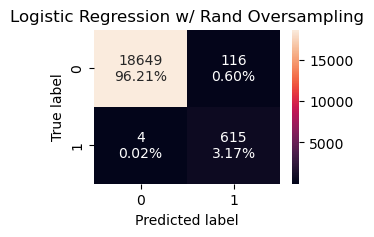

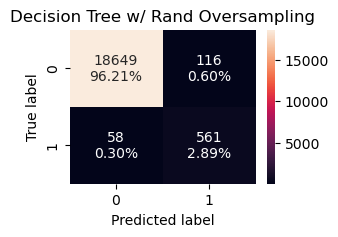

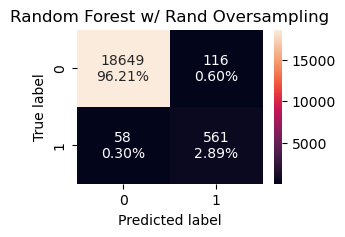

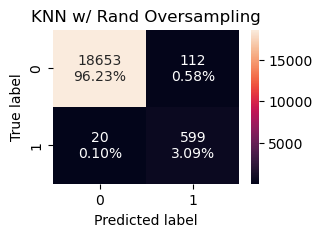

In [186]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_rndovr_npa, "Logistic Regression w/ Rand Oversampling")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_rndovr_npa, "SVM w/ Rand Oversampling")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_rndovr_npa, "Decision Tree w/ Rand Oversampling")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_rndovr_npa, "Random Forest w/ Rand Oversampling")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_rndovr_npa, "KNN w/ Rand Oversampling")

In [187]:
# Print the classification report for the Logistics Regression model
logreg_rndovr_class_rpt = classification_report(y_test_srs, logreg_y_pred_rndovr_npa)

#### # Print the classification report for the SVM model
#### svm_rndovr_class_rpt = classification_report(y_test_srs, svm_y_pred_rndovr_npa)

# Print the classification report for the Decision Tree model
dectree_rndovr_class_rpt = classification_report(y_test_srs, dectree_y_pred_rndovr_npa)

# Print the classification report for the Random Forest model
rndfor_rndovr_class_rpt = classification_report(y_test_srs, rndfor_y_pred_rndovr_npa)

# Print the classification report for the KNN model
knn_rndovr_class_rpt = classification_report(y_test_srs, knn_y_pred_rndovr_npa)

In [188]:
print("Logistic Regression (w/ Random Oversampling) Classification Report:\n", logreg_rndovr_class_rpt)
####print("SVM (ww/ Random Oversampling) Classification Report:\n", svm_rndovr_class_rpt)
print("Decision Tree (ww/ Random Oversampling) Classification Report:\n", dectree_rndovr_class_rpt)
print("Random Forest (ww/ Random Oversampling) Classification Report:\n", rndfor_rndovr_class_rpt)
print("KNN (ww/ Random Oversampling) Classification Report:\n", knn_rndovr_class_rpt)

Logistic Regression (w/ Random Oversampling) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ Random Oversampling) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.91      0.87       619

    accuracy                           0.99     19384
   macro avg       0.91      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ Random Oversampling) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.91      0

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** \
- Logistics Regression (w/ Random Oversampling) classification report analysis:\
-- "accuracy = 0.99".  The model predicted correctly 99% of the time that the loan was either healhty loan or a high risk loan\
                       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** No improvement using random oversampling compared to the original non oversampling accuracy score of 0.99 **\
-- "precision /0 (healthy loan) = 1.00".  Out of all the loans the model predicted would be a healthy loan (0), the model predicted this correctly 100% of the time\
                       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** No improvement using random oversampling compared to the original non oversampling precision /0 score of 1.00**\
-- "precision /1 (high-risk loan) = 0.84".  Out of all the loans the model predicted would be a high-risk loan (1), the model predicted this correctly 84% of the time\
                       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** No improvement using random oversampling compared to the original non oversampling precision /1 score of 0.84 **\
-- "recall /0 (healthy loan) = 0.99".  Out of all the loans that were declared a healthy loan, the model predicted this outcome 99% of the time\
                       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** No improvement using random oversampling compared to the original non oversampling recall /0 score of 0.99**\
-- "recall /1 (high-risk loan) = 0.99".  Out of all the loans that were declared a high-risk loan, the model predicted this outcome 99% of the time
                       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** Here we do have a considerable improvement using random oversampling compared to the original non oversampling recall /1 score of 0.85**\

### Step 1b: Use the `RandomUnderSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [189]:
# Instantiate the random undersampler model
random_undersampler = RandomUnderSampler(random_state=1)

# Fit the original training data to the random_undersampler model
X_train_rndunder_df, y_train_rndunder_srs = random_undersampler.fit_resample(X_train_df, y_train_srs)

In [190]:
# Count the distinct values of the resampled labels data
print("# of random under sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_rndunder_srs.value_counts())

# of random under sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    1881
1    1881
Name: loan_status, dtype: int64

### Step 2b-a: Use the `LogisticRegression` classifier and the undersampled resampled data to fit the model and make predictions.

In [191]:
# Instantiate the model
logreg_rndunder_model = LogisticRegression(random_state=1)

# Fit the model using the rndunder training data
logreg_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
logreg_y_pred_rndunder_npa = logreg_rndunder_model.predict(X_test_df)

### Step 2b-b: Use the `SVM` classifier and the undersampled resampled data to fit the model and make predictions.

In [192]:
#### # Instantiate the model
#### svm_rndunder_model = SVC(kernel='linear')
#### 
#### # Fit the model using the rndunder training data
#### svm_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_rndunder_npa = svm_rndunder_model.predict(X_test_df)

### Step 2b-c: Use the `Decision Tree` classifier and the undersampled resampled data to fit the model and make predictions.

In [193]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_rndunder_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the rndunder training data
dectree_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
dectree_y_pred_rndunder_npa = dectree_rndunder_model.predict(X_test_df)

### Step 2b-d: Use the `Random Forest` classifier and the undersampled resampled data to fit the model and make predictions.

In [194]:
# Instantiate the model
# Create a random forest classifier
rndfor_rndunder_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the rndunder training data
rndfor_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
rndfor_y_pred_rndunder_npa = rndfor_rndunder_model.predict(X_test_df)

### Step 2b-e: Use the `KNN` classifier and the undersampled resampled data to fit the model and make predictions.

In [195]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_rndunder_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the rndunder training data
knn_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
knn_y_pred_rndunder_npa = knn_rndunder_model.predict(X_test_df)

### Step 3b: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [196]:
print("Balanced Accuracy Scores (Random Undersampled):")
print("-----------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_rndunder_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_rndunder_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_rndunder_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_rndunder_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_rndunder_npa))

Balanced Accuracy Scores (Random Undersampled):
-----------------------------------------------
Logistic Regression:                   0.9936781215845847
Decision Tree:                         0.990730345179968
Random Forest:                         0.9901441474714681
KNN:                                   0.9934383134311076


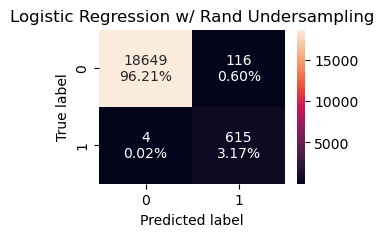

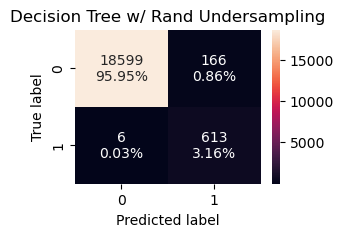

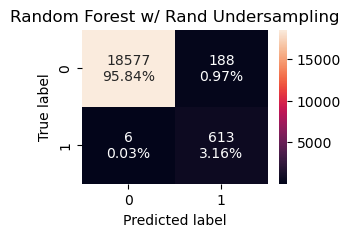

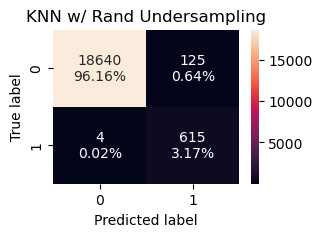

In [197]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_rndunder_npa, "Logistic Regression w/ Rand Undersampling")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_rndunder_npa, "SVM w/ Rand Undersampling")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_rndunder_npa, "Decision Tree w/ Rand Undersampling")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_rndunder_npa, "Random Forest w/ Rand Undersampling")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_rndunder_npa, "KNN w/ Rand Undersampling")

In [198]:
# Print the classification report for the Logistics Regression model
logreg_rndunder_class_rpt = classification_report(y_test_srs, logreg_y_pred_rndunder_npa)

#### # Print the classification report for the SVM model
#### svm_rndunder_class_rpt = classification_report(y_test_srs, svm_y_pred_rndunder_npa)

# Print the classification report for the Decision Tree model
dectree_rndunder_class_rpt = classification_report(y_test_srs, dectree_y_pred_rndunder_npa)

# Print the classification report for the Random Forest model
rndfor_rndunder_class_rpt = classification_report(y_test_srs, rndfor_y_pred_rndunder_npa)

# Print the classification report for the KNN model
knn_rndunder_class_rpt = classification_report(y_test_srs, knn_y_pred_rndunder_npa)

In [199]:
print("Logistic Regression (w/ Random Undersampling) Classification Report:\n", logreg_rndunder_class_rpt)
####print("SVM (ww/ Random Undersampling) Classification Report:\n", svm_rndunder_class_rpt)
print("Decision Tree (ww/ Random Undersampling) Classification Report:\n", dectree_rndunder_class_rpt)
print("Random Forest (ww/ Random Undersampling) Classification Report:\n", rndfor_rndunder_class_rpt)
print("KNN (ww/ Random Undersampling) Classification Report:\n", knn_rndunder_class_rpt)

Logistic Regression (w/ Random Undersampling) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ Random Undersampling) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.79      0.99      0.88       619

    accuracy                           0.99     19384
   macro avg       0.89      0.99      0.94     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ Random Undersampling) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.77      0.99    

### Step 1c: Use the `SMOTE Oversampling` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [200]:
# Instantiate a SMOTE instance
smote_sampler =  SMOTE(random_state=1, sampling_strategy='auto')
# Fit the training data to the SMOTE model
X_train_smote_df, y_train_smote_srs = smote_sampler.fit_resample(X_train_df, y_train_srs)
# Count distinct values for the resampled target data

In [201]:
# Count the distinct values of the resampled labels data
print("# of SMOTE Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_smote_srs.value_counts())

# of SMOTE Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2c-a: Use the `LogisticRegression` classifier and the smote sampled data to fit the model and make predictions.

In [202]:
# Instantiate the model
logreg_smote_model = LogisticRegression(random_state=1)

# Fit the model using the smote training data
logreg_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
logreg_y_pred_smote_npa = logreg_smote_model.predict(X_test_df)

### Step 2c-b: Use the `SVM` classifier and the smote sampled data to fit the model and make predictions.

In [203]:
#### # Instantiate the model
#### svm_smote_model = SVC(kernel='linear')
#### 
#### # Fit the model using the smote training data
#### svm_smote_model.fit(X_train_smote_df, y_train_smote_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_smote_npa = svm_smote_model.predict(X_test_df)

### Step 2c-c: Use the `Decision Tree` classifier and the smote sampled data to fit the model and make predictions.

In [204]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_smote_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the smote training data
dectree_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
dectree_y_pred_smote_npa = dectree_smote_model.predict(X_test_df)

### Step 2c-d: Use the `Random Forest` classifier and the smote sampled data to fit the model and make predictions.

In [205]:
# Instantiate the model
# Create a random forest classifier
rndfor_smote_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the smote training data
rndfor_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
rndfor_y_pred_smote_npa = rndfor_smote_model.predict(X_test_df)

### Step 2c-e: Use the `KNN` classifier and the smote sampled data to fit the model and make predictions.

In [206]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_smote_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the smote training data
knn_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
knn_y_pred_smote_npa = knn_smote_model.predict(X_test_df)

### Step 3c: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [207]:
print("Balanced Accuracy Scores (SMOTE Sampled):")
print("-----------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_smote_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_smote_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_smote_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_smote_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_smote_npa))

Balanced Accuracy Scores (SMOTE Sampled):
-----------------------------------------
Logistic Regression:                   0.9936781215845847
Decision Tree:                         0.9390172729882869
Random Forest:                         0.9591311980033637
KNN:                                   0.9829907963774376


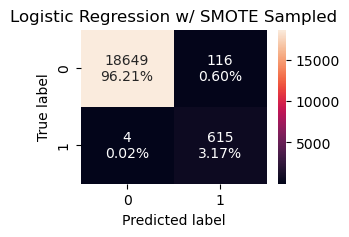

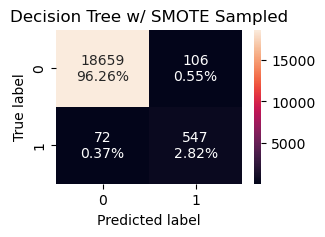

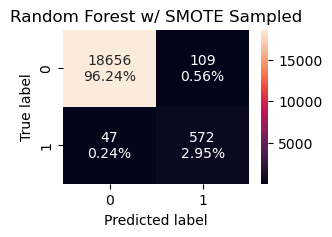

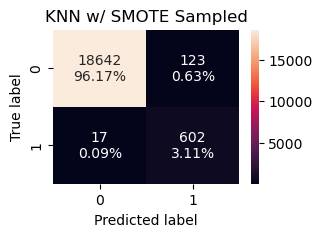

In [208]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_smote_npa, "Logistic Regression w/ SMOTE Sampled")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_smote_npa, "SVM w/ SMOTE Sampled")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_smote_npa, "Decision Tree w/ SMOTE Sampled")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_smote_npa, "Random Forest w/ SMOTE Sampled")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_smote_npa, "KNN w/ SMOTE Sampled")

In [209]:
# Print the classification report for the Logistics Regression model
logreg_smote_class_rpt = classification_report(y_test_srs, logreg_y_pred_smote_npa)

#### # Print the classification report for the SVM model
#### svm_smote_class_rpt = classification_report(y_test_srs, svm_y_pred_smote_npa)

# Print the classification report for the Decision Tree model
dectree_smote_class_rpt = classification_report(y_test_srs, dectree_y_pred_smote_npa)

# Print the classification report for the Random Forest model
rndfor_smote_class_rpt = classification_report(y_test_srs, rndfor_y_pred_smote_npa)

# Print the classification report for the KNN model
knn_smote_class_rpt = classification_report(y_test_srs, knn_y_pred_smote_npa)

In [210]:
print("Logistic Regression (w/ SMOTE Sampled) Classification Report:\n", logreg_smote_class_rpt)
####print("SVM (ww/ SMOTE Sampled) Classification Report:\n", svm_smote_class_rpt)
print("Decision Tree (ww/ SMOTE Sampled)g Classification Report:\n", dectree_smote_class_rpt)
print("Random Forest (ww/ SMOTE Sampled)g Classification Report:\n", rndfor_smote_class_rpt)
print("KNN (ww/ SMOTE Sampled) Classification Report:\n", knn_smote_class_rpt)

Logistic Regression (w/ SMOTE Sampled) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ SMOTE Sampled)g Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.88      0.86       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ SMOTE Sampled)g Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.92      0.88       619

 

### Step 1d: Use the `SMOTEENN Combined Sampling` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [211]:
# Instantiate a SMOTEENN instance
smoteenn_sampler =  SMOTEENN(random_state=1)
# Fit the training data to the SMOTEENN model
X_train_smoteenn_df, y_train_smoteenn_srs = smoteenn_sampler.fit_resample(X_train_df, y_train_srs)
# Count distinct values for the resampled target data

In [212]:
# Count the distinct values of the resampled labels data
print("# of SMOTEENN Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_smoteenn_srs.value_counts())

# of SMOTEENN Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    55922
1    54578
Name: loan_status, dtype: int64

### Step 2d-a: Use the `LogisticRegression` classifier and the smoteenn sampled data to fit the model and make predictions.

In [213]:
# Instantiate the model
logreg_smoteenn_model = LogisticRegression(random_state=1)

# Fit the model using the smoteenn training data
logreg_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
logreg_y_pred_smoteenn_npa = logreg_smoteenn_model.predict(X_test_df)

### Step 2d-b: Use the `SVM` classifier and the smoteenn sampled data to fit the model and make predictions.

In [214]:
#### # Instantiate the model
#### svm_smoteenn_model = SVC(kernel='linear')
#### 
#### # Fit the model using the smoteenn training data
#### svm_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_smoteenn_npa = svm_smoteenn_model.predict(X_test_df)

### Step 2d-c: Use the `Decision Tree` classifier and the smoteenn sampled data to fit the model and make predictions.

In [215]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_smoteenn_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the smoteenn training data
dectree_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
dectree_y_pred_smoteenn_npa = dectree_smoteenn_model.predict(X_test_df)

### Step 2d-d: Use the `Random Forest` classifier and the smoteenn sampled data to fit the model and make predictions.

In [216]:
# Instantiate the model
# Create a random forest classifier
rndfor_smoteenn_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the smoteenn training data
rndfor_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
rndfor_y_pred_smoteenn_npa = rndfor_smoteenn_model.predict(X_test_df)

### Step 2d-e: Use the `KNN` classifier and the smoteenn sampled data to fit the model and make predictions.

In [217]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_smoteenn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the smoteenn training data
knn_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
knn_y_pred_smoteenn_npa = knn_smoteenn_model.predict(X_test_df)

### Step 3d: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [218]:
print("Balanced Accuracy Scores (SMOTEENN Sampled):")
print("--------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_smoteenn_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_smoteenn_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_smoteenn_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_smoteenn_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_smoteenn_npa))

Balanced Accuracy Scores (SMOTEENN Sampled):
--------------------------------------------
Logistic Regression:                   0.9935182494822666
Decision Tree:                         0.993624830883812
Random Forest:                         0.993624830883812
KNN:                                   0.9935715401830394


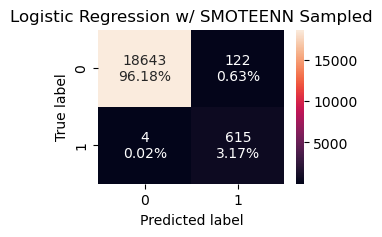

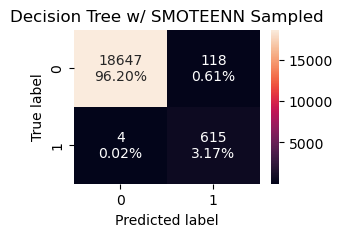

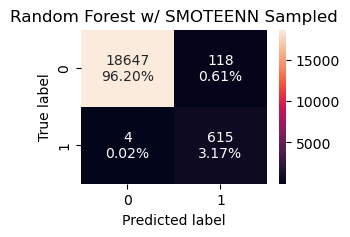

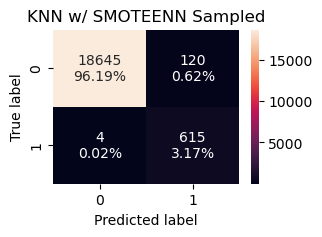

In [219]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_smoteenn_npa, "Logistic Regression w/ SMOTEENN Sampled")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_smoteenn_npa, "SVM w/ SMOTEENN Sampled")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_smoteenn_npa, "Decision Tree w/ SMOTEENN Sampled")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_smoteenn_npa, "Random Forest w/ SMOTEENN Sampled")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_smoteenn_npa, "KNN w/ SMOTEENN Sampled")

In [220]:
# Print the classification report for the Logistics Regression model
logreg_smoteenn_class_rpt = classification_report(y_test_srs, logreg_y_pred_smoteenn_npa)

#### # Print the classification report for the SVM model
#### svm_smoteenn_class_rpt = classification_report(y_test_srs, svm_y_pred_smoteenn_npa)

# Print the classification report for the Decision Tree model
dectree_smoteenn_class_rpt = classification_report(y_test_srs, dectree_y_pred_smoteenn_npa)

# Print the classification report for the Random Forest model
rndfor_smoteenn_class_rpt = classification_report(y_test_srs, rndfor_y_pred_smoteenn_npa)

# Print the classification report for the KNN model
knn_smoteenn_class_rpt = classification_report(y_test_srs, knn_y_pred_smoteenn_npa)

In [221]:
print("Logistic Regression (w/ SMOTEENN Sampled) Classification Report:\n", logreg_smoteenn_class_rpt)
####print("SVM (ww/ SMOTEENN Sampled) Classification Report:\n", svm_smoteenn_class_rpt)
print("Decision Tree (ww/ SMOTEENN Sampled)g Classification Report:\n", dectree_smoteenn_class_rpt)
print("Random Forest (ww/ SMOTEENN Sampled)g Classification Report:\n", rndfor_smoteenn_class_rpt)
print("KNN (ww/ SMOTEENN Sampled) Classification Report:\n", knn_smoteenn_class_rpt)

Logistic Regression (w/ SMOTEENN Sampled) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ SMOTEENN Sampled)g Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ SMOTEENN Sampled)g Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91    

### Step e: Use the `ClusterCentroids` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [222]:
# Instantiate a ClusterCentroids instance
cluster_centroid_sampler = ClusterCentroids(random_state=1)
# Fit the training data to the cluster centroids model
X_train_clstrcntrd_df, y_train_clstrcntrd_srs = cluster_centroid_sampler.fit_resample(X_train_df, y_train_srs)
# Count distinct values for the resampled target data

In [223]:
# Count the distinct values of the resampled labels data
print("# of cluster centroid loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_clstrcntrd_srs.value_counts())

# of cluster centroid loan_status values that =0 (loan approved) and =1 (loan rejected)


0    1881
1    1881
Name: loan_status, dtype: int64

### Step 2e-a: Use the `LogisticRegression` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [224]:
# Instantiate the model
logreg_clstrcntrd_model = LogisticRegression(random_state=1)

# Fit the model using the clstrcntrd training data
logreg_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
logreg_y_pred_clstrcntrd_npa = logreg_clstrcntrd_model.predict(X_test_df)

### Step 2e-b: Use the `SVM` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [225]:
#### # Instantiate the model
#### svm_clstrcntrd_model = SVC(kernel='linear')
#### 
#### # Fit the model using the clstrcntrd training data
#### svm_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_clstrcntrd_npa = svm_clstrcntrd_model.predict(X_test_df)

### Step 2e-c: Use the `Decision Tree` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [226]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_clstrcntrd_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the clstrcntrd training data
dectree_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
dectree_y_pred_clstrcntrd_npa = dectree_clstrcntrd_model.predict(X_test_df)

### Step 2e-d: Use the `Random Forest` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [227]:
# Instantiate the model
# Create a random forest classifier
rndfor_clstrcntrd_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the clstrcntrd training data
rndfor_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
rndfor_y_pred_clstrcntrd_npa = rndfor_clstrcntrd_model.predict(X_test_df)

### Step 2e-e: Use the `KNN` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [228]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_clstrcntrd_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the clstrcntrd training data
knn_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
knn_y_pred_clstrcntrd_npa = knn_clstrcntrd_model.predict(X_test_df)

### Step 3e: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [229]:
print("Balanced Accuracy Scores (Cluster Centroid Sampled):")
print("----------------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_clstrcntrd_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_clstrcntrd_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_clstrcntrd_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_clstrcntrd_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_clstrcntrd_npa))

Balanced Accuracy Scores (Cluster Centroid Sampled):
----------------------------------------------------
Logistic Regression:                   0.9881037765371978
Decision Tree:                         0.9441120017287193
Random Forest:                         0.9592195279855813
KNN:                                   0.9880504858364251


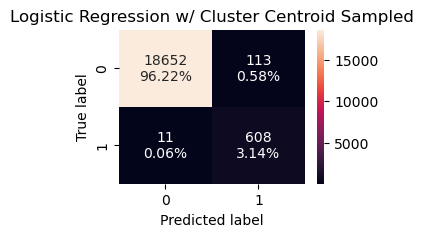

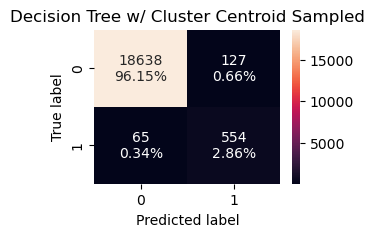

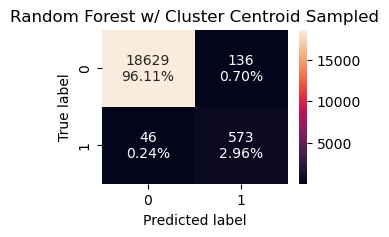

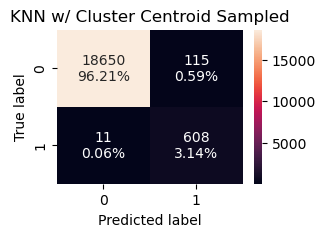

In [230]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_clstrcntrd_npa, "Logistic Regression w/ Cluster Centroid Sampled")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_clstrcntrd_npa, "SVM w/ Cluster Centroid Sampled")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_clstrcntrd_npa, "Decision Tree w/ Cluster Centroid Sampled")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_clstrcntrd_npa, "Random Forest w/ Cluster Centroid Sampled")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_clstrcntrd_npa, "KNN w/ Cluster Centroid Sampled")

In [231]:
# Print the classification report for the Logistics Regression model
logreg_clstrcntrd_class_rpt = classification_report(y_test_srs, logreg_y_pred_clstrcntrd_npa)

#### # Print the classification report for the SVM model
#### svm_clstrcntrd_class_rpt = classification_report(y_test_srs, svm_y_pred_clstrcntrd_npa)

# Print the classification report for the Decision Tree model
dectree_clstrcntrd_class_rpt = classification_report(y_test_srs, dectree_y_pred_clstrcntrd_npa)

# Print the classification report for the Random Forest model
rndfor_clstrcntrd_class_rpt = classification_report(y_test_srs, rndfor_y_pred_clstrcntrd_npa)

# Print the classification report for the KNN model
knn_clstrcntrd_class_rpt = classification_report(y_test_srs, knn_y_pred_clstrcntrd_npa)

In [232]:
print("Logistic Regression (w/ Cluster Centroid Sampled) Classification Report:\n", logreg_clstrcntrd_class_rpt)
####print("SVM (ww/ Cluster Centroid Sampled) Classification Report:\n", svm_clstrcntrd_class_rpt)
print("Decision Tree (ww/ Cluster Centroid Sampled)g Classification Report:\n", dectree_clstrcntrd_class_rpt)
print("Random Forest (ww/ Cluster Centroid Sampled)g Classification Report:\n", rndfor_clstrcntrd_class_rpt)
print("KNN (ww/ Cluster Centroid Sampled) Classification Report:\n", knn_clstrcntrd_class_rpt)

Logistic Regression (w/ Cluster Centroid Sampled) Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.98      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ Cluster Centroid Sampled)g Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.81      0.89      0.85       619

    accuracy                           0.99     19384
   macro avg       0.91      0.94      0.92     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ Cluster Centroid Sampled)g Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.81

In [233]:
# (Re-)Calculate classificaiton report to output to a dictionary format

# Logistic Regression
logreg_class_rpt_dict = classification_report(y_test_srs, logreg_y_pred_npa, output_dict = True)
#### svm_class_rpt_dict = classification_report(y_test_srs, svm_y_pred_npa, output_dict = True)
dectree_class_rpt_dict = classification_report(y_test_srs, dectree_y_pred_npa, output_dict = True)
rndfor_class_rpt_dict = classification_report(y_test_srs, rndfor_y_pred_npa, output_dict = True)
knn_class_rpt_dict = classification_report(y_test_srs, knn_y_pred_npa, output_dict = True)

logreg_rndovr_class_rpt_dict = classification_report(y_test_srs, logreg_y_pred_rndovr_npa, output_dict = True)
#### svm_rndovr_class_rpt_dict = classification_report(y_test_srs, svm_y_pred_rndovr_np, output_dict = Truea)
dectree_rndovr_class_rpt_dict = classification_report(y_test_srs, dectree_y_pred_rndovr_npa, output_dict = True)
rndfor_rndovr_class_rpt_dict = classification_report(y_test_srs, rndfor_y_pred_rndovr_npa, output_dict = True)
knn_rndovr_class_rpt_dict = classification_report(y_test_srs, knn_y_pred_rndovr_npa, output_dict = True)

logreg_rndunder_class_rpt_dict = classification_report(y_test_srs, logreg_y_pred_rndunder_npa, output_dict = True)
#### svm_rndunder_class_rpt_dict = classification_report(y_test_srs, svm_y_pred_rndunder_npa, output_dict = True)
dectree_rndunder_class_rpt_dict = classification_report(y_test_srs, dectree_y_pred_rndunder_npa, output_dict = True)
rndfor_rndunder_class_rpt_dict = classification_report(y_test_srs, rndfor_y_pred_rndunder_npa, output_dict = True)
knn_rndunder_class_rpt_dict = classification_report(y_test_srs, knn_y_pred_rndunder_npa, output_dict = True)

logreg_smote_class_rpt_dict = classification_report(y_test_srs, logreg_y_pred_smote_npa, output_dict = True)
#### svm_smote_class_rpt_dict = classification_report(y_test_srs, svm_y_pred_smote_npa, output_dict = True)
dectree_smote_class_rpt_dict = classification_report(y_test_srs, dectree_y_pred_smote_npa, output_dict = True)
rndfor_smote_class_rpt_dict = classification_report(y_test_srs, rndfor_y_pred_smote_npa, output_dict = True)
knn_smote_class_rpt_dict = classification_report(y_test_srs, knn_y_pred_smote_npa, output_dict = True)

logreg_smoteenn_class_rpt_dict = classification_report(y_test_srs, logreg_y_pred_smoteenn_npa, output_dict = True)
#### svm_smoteenn_class_rpt_dict = classification_report(y_test_srs, svm_y_pred_smoteenn_npa, output_dict = True)
dectree_smoteenn_class_rpt_dict = classification_report(y_test_srs, dectree_y_pred_smoteenn_npa, output_dict = True)
rndfor_smoteenn_class_rpt_dict = classification_report(y_test_srs, rndfor_y_pred_smoteenn_npa, output_dict = True)
knn_smoteenn_class_rpt_dict = classification_report(y_test_srs, knn_y_pred_smoteenn_npa, output_dict = True)

logreg_clstrcntrd_class_rpt_dict = classification_report(y_test_srs, logreg_y_pred_clstrcntrd_npa, output_dict = True)
#### svm_clstrcntrd_class_rpt_dict = classification_report(y_test_srs, svm_y_pred_clstrcntrd_npa, output_dict = True)
dectree_clstrcntrd_class_rpt_dict = classification_report(y_test_srs, dectree_y_pred_clstrcntrd_npa, output_dict = True)
rndfor_clstrcntrd_class_rpt_dict = classification_report(y_test_srs, rndfor_y_pred_clstrcntrd_npa, output_dict = True)
knn_clstrcntrd_class_rpt_dict = classification_report(y_test_srs, knn_y_pred_clstrcntrd_npa, output_dict = True)

## Scale the data

In [234]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train_df)
X_train_scaled_npa = X_scaler.transform(X_train_df)
X_test_scaled_npa = X_scaler.transform(X_test_df)

## Create Regression Models with the Original Data

###  Step 1a: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [235]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg_model = LogisticRegression(random_state=1)

# Fit the model using training data
logreg_model.fit(X_train_scaled_npa, y_train_srs)

LogisticRegression(random_state=1)

###  Step 1b: Fit a Support Vector Machine model by using the training data (`X_train` and `y_train`).

In [236]:
#### svm_model = SVC(kernel='linear')
#### 
#### # Fit the data
#### svm_model.fit(X_train_scaled_npa, y_train_srs)

###  Step 1c: Fit a Decision Tree model by using the training data (`X_train` and `y_train`).

In [237]:
# Creating the decision tree classifier instance
dectree_model = tree.DecisionTreeClassifier(random_state=1)

# Fitting the model
dectree_model = dectree_model.fit(X_train_scaled_npa, y_train_srs)

###  Step 1d: Fit a Random Forest model by using the training data (`X_train` and `y_train`).

In [238]:
# Create a random forest classifier
rndfor_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
rndfor_model = rndfor_model.fit(X_train_scaled_npa, y_train_srs)

###  Step 1e: Fit a KNN model by using the training data (`X_train` and `y_train`).

In [239]:
# Instantiate the model with k = 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_model.fit(X_train_scaled_npa, y_train_srs)

KNeighborsClassifier(n_neighbors=3)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [240]:
# Make a prediction using the testing data on the logistics Regression model
logreg_y_pred_npa = logreg_model.predict(X_test_scaled_npa)

#### # Make a prediction using the testing data on the Support Vector Matrix model
#### svm_y_pred_npa = svm_model.predict(X_test_scaled_npa)

# Make a prediction using the testing data on the Decision Tree model
dectree_y_pred_npa = dectree_model.predict(X_test_scaled_npa)

# Make a prediction using the testing data on the Random Forest model
rndfor_y_pred_npa = rndfor_model.predict(X_test_scaled_npa)

# Make a prediction using the testing data on the KNN model
knn_y_pred_npa = knn_model.predict(X_test_scaled_npa)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [241]:
print("Balanced Accuracy Scores (w/ Scaling):")
print("--------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_npa))


Balanced Accuracy Scores (w/ Scaling):
--------------------------------------
Logistic Regression:                   0.9889115309798473
Decision Tree:                         0.9238831013810385
Random Forest:                         0.9440503170968879
KNN:                                   0.9607999975894352


In [242]:
# Print confusion matrix
def confusion_matrix_sklearn(y_test, y_pred, plt_title):
    """
    To plot the confusion_matrix with percentages
    prediction:  predicted values
    original:    original values
    """
    cm = confusion_matrix(y_test, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(plt_title)

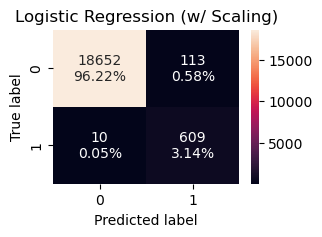

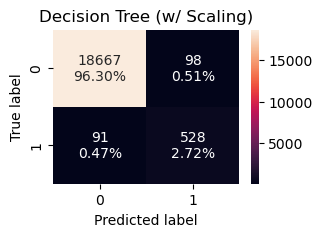

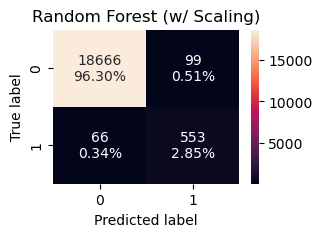

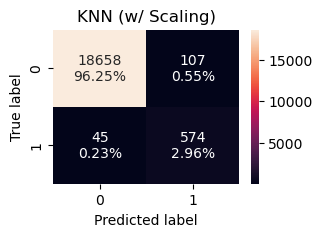

In [243]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_npa, "Logistic Regression (w/ Scaling)")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_npa, "SVM (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_npa, "Decision Tree (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_npa, "Random Forest (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_npa, "KNN (w/ Scaling)")

In [244]:
# Print the classification report for the Logistics Regression model
logreg_class_rpt = classification_report(y_test_srs, logreg_y_pred_npa)

#### # Print the classification report for the SVM model
#### svm_class_rpt = classification_report(y_test_srs, svm_y_pred_npa)

# Print the classification report for the Decision Tree model
dectree_class_rpt = classification_report(y_test_srs, dectree_y_pred_npa)

# Print the classification report for the Random Forest model
rndfor_class_rpt = classification_report(y_test_srs, rndfor_y_pred_npa)

# Print the classification report for the KNN model
knn_class_rpt = classification_report(y_test_srs, knn_y_pred_npa)

In [245]:
print("Logistic Regression Classification Report (w/ Scaling):\n", logreg_class_rpt)
####print("SVM Classification Report (w/ Scaling):\n", svm_class_rpt)
print("Decision Tree Classification Report (w/ Scaling):\n", dectree_class_rpt)
print("Random Forest Classification Report (w/ Scaling):\n", rndfor_class_rpt)
print("KNN Classification Report (w/ Scaling):\n", knn_class_rpt)

Logistic Regression Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.98      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.84      0.85      0.85       619

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.89      0.87       619

    accuracy           

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1a: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [246]:
# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_rndovr_df, y_train_rndovr_srs = random_oversampler.fit_resample(X_train_scaled_npa, y_train_srs)

In [247]:
# Count the distinct values of the resampled labels data
print("# of random over sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_rndovr_srs.value_counts())

# of random over sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2a-a: Use the `LogisticRegression` classifier and the oversampled resampled data to fit the model and make predictions.

In [248]:
# Instantiate the model
logreg_rndovr_model = LogisticRegression(random_state=1)

# Fit the model using the rndovr training data
logreg_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
logreg_y_pred_rndovr_npa = logreg_rndovr_model.predict(X_test_scaled_npa)

### Step 2a-b: Use the `SVM` classifier and the oversampled resampled data to fit the model and make predictions.

In [249]:
#### # Instantiate the model
#### svm_rndovr_model = SVC(kernel='linear')
#### 
#### # Fit the model using the rndovr training data
#### svm_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_rndovr_npa = svm_rndovr_model.predict(X_test_scaled_npa)

### Step 2a-c: Use the `Decision Tree` classifier and the oversampled resampled data to fit the model and make predictions.

In [250]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_rndovr_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the rndovr training data
dectree_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
dectree_y_pred_rndovr_npa = dectree_rndovr_model.predict(X_test_scaled_npa)

### Step 2a-d: Use the `Random Forest` classifier and the oversampled resampled data to fit the model and make predictions.

In [251]:
# Instantiate the model
# Create a random forest classifier
rndfor_rndovr_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the rndovr training data
rndfor_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
rndfor_y_pred_rndovr_npa = rndfor_rndovr_model.predict(X_test_scaled_npa)

### Step 2a-e: Use the `KNN` classifier and the oversampled resampled data to fit the model and make predictions.

In [252]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_rndovr_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the rndovr training data
knn_rndovr_model.fit(X_train_rndovr_df, y_train_rndovr_srs)

# Make a prediction using the testing data
knn_y_pred_rndovr_npa = knn_rndovr_model.predict(X_test_scaled_npa)

### Step 3a: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [253]:
print("Balanced Accuracy Scores (Random Oversampled) (w/ Scaling):")
print("-----------------------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_rndovr_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_rndovr_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_rndovr_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_rndovr_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_rndovr_npa))


Balanced Accuracy Scores (Random Oversampled) (w/ Scaling):
-----------------------------------------------------------
Logistic Regression:                   0.9934383134311076
Decision Tree:                         0.9492516272388658
Random Forest:                         0.9508671361241647
KNN:                                   0.980913922604512


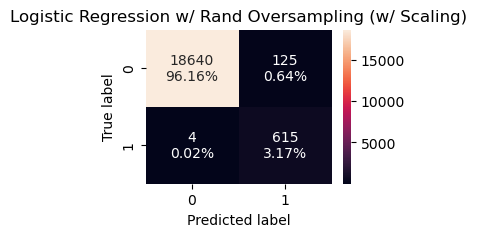

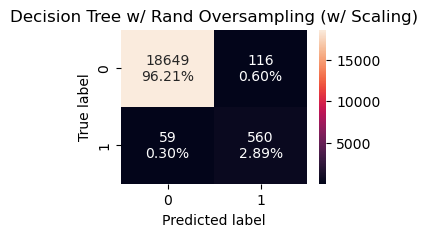

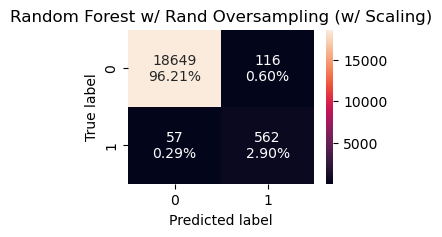

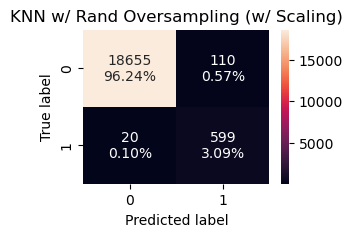

In [254]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_rndovr_npa, "Logistic Regression w/ Rand Oversampling (w/ Scaling)")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_rndovr_npa, "SVM w/ Rand Oversampling (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_rndovr_npa, "Decision Tree w/ Rand Oversampling (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_rndovr_npa, "Random Forest w/ Rand Oversampling (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_rndovr_npa, "KNN w/ Rand Oversampling (w/ Scaling)")

In [255]:
# Print the classification report for the Logistics Regression model
logreg_rndovr_class_rpt = classification_report(y_test_srs, logreg_y_pred_rndovr_npa)

#### # Print the classification report for the SVM model
#### svm_rndovr_class_rpt = classification_report(y_test_srs, svm_y_pred_rndovr_npa)

# Print the classification report for the Decision Tree model
dectree_rndovr_class_rpt = classification_report(y_test_srs, dectree_y_pred_rndovr_npa)

# Print the classification report for the Random Forest model
rndfor_rndovr_class_rpt = classification_report(y_test_srs, rndfor_y_pred_rndovr_npa)

# Print the classification report for the KNN model
knn_rndovr_class_rpt = classification_report(y_test_srs, knn_y_pred_rndovr_npa)

In [256]:
print("Logistic Regression (w/ Random Oversampling) Classification Report (w/ Scaling):\n", logreg_rndovr_class_rpt)
####print("SVM (ww/ Random Oversampling) Classification Report (w/ Scaling):\n", svm_rndovr_class_rpt)
print("Decision Tree (ww/ Random Oversampling) Classification Report (w/ Scaling):\n", dectree_rndovr_class_rpt)
print("Random Forest (ww/ Random Oversampling) Classification Report (w/ Scaling):\n", rndfor_rndovr_class_rpt)
print("KNN (ww/ Random Oversampling) Classification Report (w/ Scaling):\n", knn_rndovr_class_rpt)

Logistic Regression (w/ Random Oversampling) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ Random Oversampling) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.90      0.86       619

    accuracy                           0.99     19384
   macro avg       0.91      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ Random Oversampling) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
 

### Step 1b: Use the `RandomUnderSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [257]:
# Instantiate the random undersampler model
random_undersampler = RandomUnderSampler(random_state=1)

# Fit the original training data to the random_undersampler model
X_train_rndunder_df, y_train_rndunder_srs = random_undersampler.fit_resample(X_train_scaled_npa, y_train_srs)

In [258]:
# Count the distinct values of the resampled labels data
print("# of random under sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_rndunder_srs.value_counts())

# of random under sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    1881
1    1881
Name: loan_status, dtype: int64

### Step 2b-a: Use the `LogisticRegression` classifier and the undersampled resampled data to fit the model and make predictions.

In [259]:
# Instantiate the model
logreg_rndunder_model = LogisticRegression(random_state=1)

# Fit the model using the rndunder training data
logreg_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
logreg_y_pred_rndunder_npa = logreg_rndunder_model.predict(X_test_scaled_npa)

### Step 2b-b: Use the `SVM` classifier and the undersampled resampled data to fit the model and make predictions.

In [260]:
#### # Instantiate the model
#### svm_rndunder_model = SVC(kernel='linear')
#### 
#### # Fit the model using the rndunder training data
#### svm_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_rndunder_npa = svm_rndunder_model.predict(X_test_scaled_npa)

### Step 2b-c: Use the `Decision Tree` classifier and the undersampled resampled data to fit the model and make predictions.

In [261]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_rndunder_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the rndunder training data
dectree_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
dectree_y_pred_rndunder_npa = dectree_rndunder_model.predict(X_test_scaled_npa)

### Step 2b-d: Use the `Random Forest` classifier and the undersampled resampled data to fit the model and make predictions.

In [262]:
# Instantiate the model
# Create a random forest classifier
rndfor_rndunder_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the rndunder training data
rndfor_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
rndfor_y_pred_rndunder_npa = rndfor_rndunder_model.predict(X_test_scaled_npa)

### Step 2b-e: Use the `KNN` classifier and the undersampled resampled data to fit the model and make predictions.

In [263]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_rndunder_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the rndunder training data
knn_rndunder_model.fit(X_train_rndunder_df, y_train_rndunder_srs)

# Make a prediction using the testing data
knn_y_pred_rndunder_npa = knn_rndunder_model.predict(X_test_scaled_npa)

### Step 3b: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [264]:
print("Balanced Accuracy Scores (Random Undersampled) (w/ Scaling):")
print("------------------------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_rndunder_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_rndunder_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_rndunder_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_rndunder_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_rndunder_npa))

Balanced Accuracy Scores (Random Undersampled) (w/ Scaling):
------------------------------------------------------------
Logistic Regression:                   0.9935182494822666
Decision Tree:                         0.990730345179968
Random Forest:                         0.9901441474714681
KNN:                                   0.9931985052776303


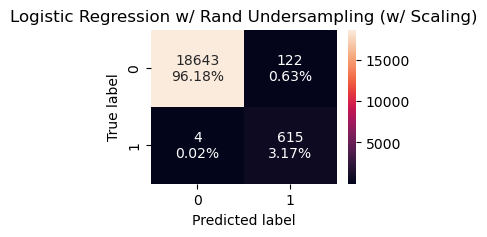

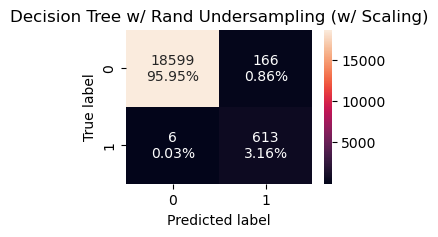

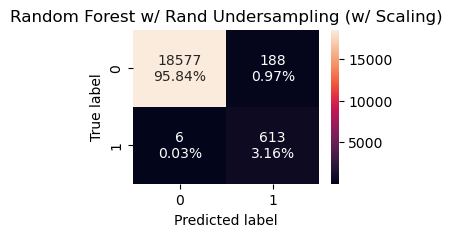

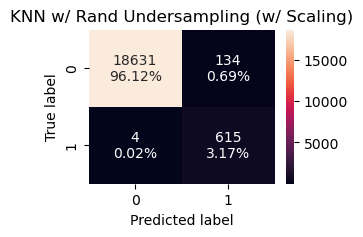

In [265]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_rndunder_npa, "Logistic Regression w/ Rand Undersampling (w/ Scaling)")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_rndunder_npa, "SVM w/ Rand Undersampling (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_rndunder_npa, "Decision Tree w/ Rand Undersampling (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_rndunder_npa, "Random Forest w/ Rand Undersampling (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_rndunder_npa, "KNN w/ Rand Undersampling (w/ Scaling)")

In [266]:
# Print the classification report for the Logistics Regression model
logreg_rndunder_class_rpt = classification_report(y_test_srs, logreg_y_pred_rndunder_npa)

#### # Print the classification report for the SVM model
#### svm_rndunder_class_rpt = classification_report(y_test_srs, svm_y_pred_rndunder_npa)

# Print the classification report for the Decision Tree model
dectree_rndunder_class_rpt = classification_report(y_test_srs, dectree_y_pred_rndunder_npa)

# Print the classification report for the Random Forest model
rndfor_rndunder_class_rpt = classification_report(y_test_srs, rndfor_y_pred_rndunder_npa)

# Print the classification report for the KNN model
knn_rndunder_class_rpt = classification_report(y_test_srs, knn_y_pred_rndunder_npa)

In [267]:
print("Logistic Regression (w/ Random Undersampling) Classification Report (w/ Scaling):\n", logreg_rndunder_class_rpt)
####print("SVM (ww/ Random Undersampling) Classification Report (w/ Scaling):\n", svm_rndunder_class_rpt)
print("Decision Tree (ww/ Random Undersampling) Classification Report (w/ Scaling):\n", dectree_rndunder_class_rpt)
print("Random Forest (ww/ Random Undersampling) Classification Report (w/ Scaling):\n", rndfor_rndunder_class_rpt)
print("KNN (ww/ Random Undersampling) Classification Report (w/ Scaling):\n", knn_rndunder_class_rpt)

Logistic Regression (w/ Random Undersampling) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ Random Undersampling) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.79      0.99      0.88       619

    accuracy                           0.99     19384
   macro avg       0.89      0.99      0.94     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ Random Undersampling) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     1876

### Step 1c: Use the `SMOTE Oversampling` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [268]:
# Instantiate a SMOTE instance
smote_sampler =  SMOTE(random_state=1, sampling_strategy='auto')
# Fit the training data to the SMOTE model
X_train_smote_df, y_train_smote_srs = smote_sampler.fit_resample(X_train_scaled_npa, y_train_srs)
# Count distinct values for the resampled target data

In [269]:
# Count the distinct values of the resampled labels data
print("# of SMOTE Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_smote_srs.value_counts())

# of SMOTE Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2c-a: Use the `LogisticRegression` classifier and the smote sampled data to fit the model and make predictions.

In [270]:
# Instantiate the model
logreg_smote_model = LogisticRegression(random_state=1)

# Fit the model using the smote training data
logreg_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
logreg_y_pred_smote_npa = logreg_smote_model.predict(X_test_scaled_npa)

### Step 2c-b: Use the `SVM` classifier and the smote sampled data to fit the model and make predictions.

In [271]:
#### # Instantiate the model
#### svm_smote_model = SVC(kernel='linear')
#### 
#### # Fit the model using the smote training data
#### svm_smote_model.fit(X_train_smote_df, y_train_smote_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_smote_npa = svm_smote_model.predict(X_test_scaled_npa)

### Step 2c-c: Use the `Decision Tree` classifier and the smote sampled data to fit the model and make predictions.

In [272]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_smote_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the smote training data
dectree_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
dectree_y_pred_smote_npa = dectree_smote_model.predict(X_test_scaled_npa)

### Step 2c-d: Use the `Random Forest` classifier and the smote sampled data to fit the model and make predictions.

In [273]:
# Instantiate the model
# Create a random forest classifier
rndfor_smote_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the smote training data
rndfor_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
rndfor_y_pred_smote_npa = rndfor_smote_model.predict(X_test_scaled_npa)

### Step 2c-e: Use the `KNN` classifier and the smote sampled data to fit the model and make predictions.

In [274]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_smote_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the smote training data
knn_smote_model.fit(X_train_smote_df, y_train_smote_srs)

# Make a prediction using the testing data
knn_y_pred_smote_npa = knn_smote_model.predict(X_test_scaled_npa)

### Step 3c: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [275]:
print("Balanced Accuracy Scores (SMOTE Sampled) (w/ Scaling):")
print("------------------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_smote_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_smote_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_smote_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_smote_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_smote_npa))

Balanced Accuracy Scores (SMOTE Sampled) (w/ Scaling):
------------------------------------------------------
Logistic Regression:                   0.9933850227303349
Decision Tree:                         0.9414671816666215
Random Forest:                         0.9575689798188374
KNN:                                   0.9864349769511263


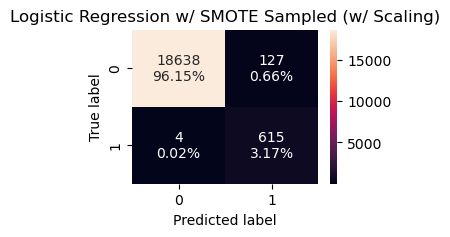

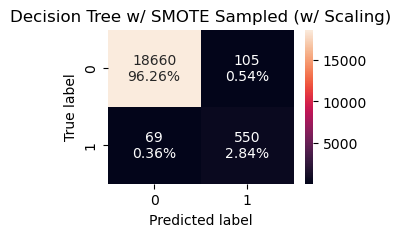

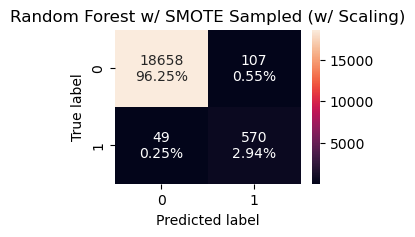

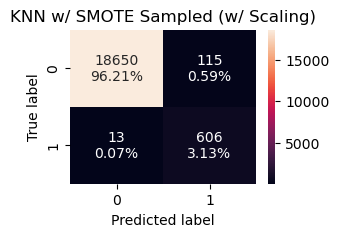

In [276]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_smote_npa, "Logistic Regression w/ SMOTE Sampled (w/ Scaling)")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_smote_npa, "SVM w/ SMOTE Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_smote_npa, "Decision Tree w/ SMOTE Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_smote_npa, "Random Forest w/ SMOTE Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_smote_npa, "KNN w/ SMOTE Sampled (w/ Scaling)")

In [277]:
# Print the classification report for the Logistics Regression model
logreg_smote_class_rpt = classification_report(y_test_srs, logreg_y_pred_smote_npa)

#### # Print the classification report for the SVM model
#### svm_smote_class_rpt = classification_report(y_test_srs, svm_y_pred_smote_npa)

# Print the classification report for the Decision Tree model
dectree_smote_class_rpt = classification_report(y_test_srs, dectree_y_pred_smote_npa)

# Print the classification report for the Random Forest model
rndfor_smote_class_rpt = classification_report(y_test_srs, rndfor_y_pred_smote_npa)

# Print the classification report for the KNN model
knn_smote_class_rpt = classification_report(y_test_srs, knn_y_pred_smote_npa)

In [278]:
print("Logistic Regression (w/ SMOTE Sampled) Classification Report (w/ Scaling):\n", logreg_smote_class_rpt)
####print("SVM (ww/ SMOTE Sampled) Classification Report (w/ Scaling):\n", svm_smote_class_rpt)
print("Decision Tree (ww/ SMOTE Sampled)g Classification Report (w/ Scaling):\n", dectree_smote_class_rpt)
print("Random Forest (ww/ SMOTE Sampled)g Classification Report (w/ Scaling):\n", rndfor_smote_class_rpt)
print("KNN (ww/ SMOTE Sampled) Classification Report (w/ Scaling):\n", knn_smote_class_rpt)

Logistic Regression (w/ SMOTE Sampled) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.99      0.90       619

    accuracy                           0.99     19384
   macro avg       0.91      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ SMOTE Sampled)g Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.89      0.86       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ SMOTE Sampled)g Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1     

### Step 1d: Use the `SMOTEENN Combined Sampling` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [279]:
# Instantiate a SMOTEENN instance
smoteenn_sampler =  SMOTEENN(random_state=1)
# Fit the training data to the SMOTEENN model
X_train_smoteenn_df, y_train_smoteenn_srs = smoteenn_sampler.fit_resample(X_train_scaled_npa, y_train_srs)
# Count distinct values for the resampled target data

In [280]:
# Count the distinct values of the resampled labels data
print("# of SMOTEENN Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_smoteenn_srs.value_counts())

# of SMOTEENN Sampled loan_status values that =0 (loan approved) and =1 (loan rejected)


0    55912
1    54854
Name: loan_status, dtype: int64

### Step 2d-a: Use the `LogisticRegression` classifier and the smoteenn sampled data to fit the model and make predictions.

In [281]:
# Instantiate the model
logreg_smoteenn_model = LogisticRegression(random_state=1)

# Fit the model using the smoteenn training data
logreg_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
logreg_y_pred_smoteenn_npa = logreg_smoteenn_model.predict(X_test_scaled_npa)

### Step 2d-b: Use the `SVM` classifier and the smoteenn sampled data to fit the model and make predictions.

In [282]:
#### # Instantiate the model
#### svm_smoteenn_model = SVC(kernel='linear')
#### 
#### # Fit the model using the smoteenn training data
#### svm_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_smoteenn_npa = svm_smoteenn_model.predict(X_tesX_test_scaled_npat_df)

### Step 2d-c: Use the `Decision Tree` classifier and the smoteenn sampled data to fit the model and make predictions.

In [283]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_smoteenn_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the smoteenn training data
dectree_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
dectree_y_pred_smoteenn_npa = dectree_smoteenn_model.predict(X_test_scaled_npa)

### Step 2d-d: Use the `Random Forest` classifier and the smoteenn sampled data to fit the model and make predictions.

In [284]:
# Instantiate the model
# Create a random forest classifier
rndfor_smoteenn_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the smoteenn training data
rndfor_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
rndfor_y_pred_smoteenn_npa = rndfor_smoteenn_model.predict(X_test_scaled_npa)

### Step 2d-e: Use the `KNN` classifier and the smoteenn sampled data to fit the model and make predictions.

In [285]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_smoteenn_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the smoteenn training data
knn_smoteenn_model.fit(X_train_smoteenn_df, y_train_smoteenn_srs)

# Make a prediction using the testing data
knn_y_pred_smoteenn_npa = knn_smoteenn_model.predict(X_test_scaled_npa)

### Step 3d: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [286]:
print("Balanced Accuracy Scores (SMOTEENN Sampled) (w/ Scaling):")
print("---------------------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_smoteenn_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_smoteenn_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_smoteenn_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_smoteenn_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_smoteenn_npa))

Balanced Accuracy Scores (SMOTEENN Sampled) (w/ Scaling):
---------------------------------------------------------
Logistic Regression:                   0.9934383134311076
Decision Tree:                         0.9936781215845847
Random Forest:                         0.9936781215845847
KNN:                                   0.9936781215845847


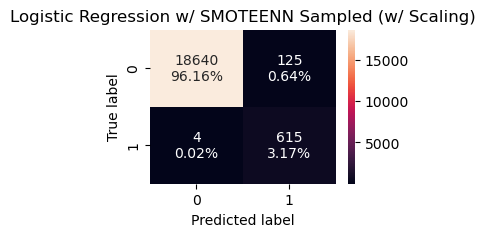

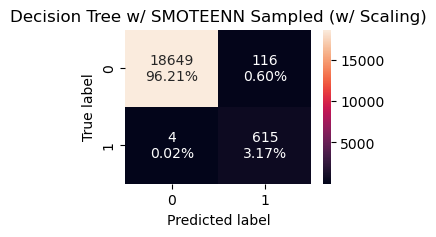

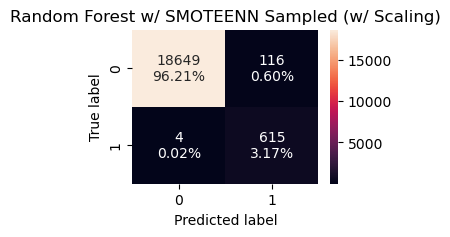

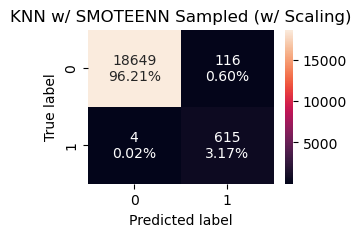

In [287]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_smoteenn_npa, "Logistic Regression w/ SMOTEENN Sampled (w/ Scaling)")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_smoteenn_npa, "SVM w/ SMOTEENN Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_smoteenn_npa, "Decision Tree w/ SMOTEENN Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_smoteenn_npa, "Random Forest w/ SMOTEENN Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_smoteenn_npa, "KNN w/ SMOTEENN Sampled (w/ Scaling)")

In [288]:
# Print the classification report for the Logistics Regression model
logreg_smoteenn_class_rpt = classification_report(y_test_srs, logreg_y_pred_smoteenn_npa)

#### # Print the classification report for the SVM model
#### svm_smoteenn_class_rpt = classification_report(y_test_srs, svm_y_pred_smoteenn_npa)

# Print the classification report for the Decision Tree model
dectree_smoteenn_class_rpt = classification_report(y_test_srs, dectree_y_pred_smoteenn_npa)

# Print the classification report for the Random Forest model
rndfor_smoteenn_class_rpt = classification_report(y_test_srs, rndfor_y_pred_smoteenn_npa)

# Print the classification report for the KNN model
knn_smoteenn_class_rpt = classification_report(y_test_srs, knn_y_pred_smoteenn_npa)

In [289]:
print("Logistic Regression (w/ SMOTEENN Sampled) Classification Report (w/ Scaling):\n", logreg_smoteenn_class_rpt)
####print("SVM (ww/ SMOTEENN Sampled) Classification Report (w/ Scaling):\n", svm_smoteenn_class_rpt)
print("Decision Tree (ww/ SMOTEENN Sampled)g Classification Report (w/ Scaling):\n", dectree_smoteenn_class_rpt)
print("Random Forest (ww/ SMOTEENN Sampled)g Classification Report (w/ Scaling):\n", rndfor_smoteenn_class_rpt)
print("KNN (ww/ SMOTEENN Sampled) Classification Report (w/ Scaling):\n", knn_smoteenn_class_rpt)

Logistic Regression (w/ SMOTEENN Sampled) Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.83      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ SMOTEENN Sampled)g Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ SMOTEENN Sampled)g Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
        

### Step e: Use the `ClusterCentroids` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [290]:
# Instantiate a ClusterCentroids instance
cluster_centroid_sampler = ClusterCentroids(random_state=1)
# Fit the training data to the cluster centroids model
X_train_clstrcntrd_df, y_train_clstrcntrd_srs = cluster_centroid_sampler.fit_resample(X_train_scaled_npa, y_train_srs)
# Count distinct values for the resampled target data

In [291]:
# Count the distinct values of the resampled labels data
print("# of cluster centroid loan_status values that =0 (loan approved) and =1 (loan rejected)")
display(y_train_clstrcntrd_srs.value_counts())

# of cluster centroid loan_status values that =0 (loan approved) and =1 (loan rejected)


0    1881
1    1881
Name: loan_status, dtype: int64

### Step 2e-a: Use the `LogisticRegression` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [292]:
# Instantiate the model
logreg_clstrcntrd_model = LogisticRegression(random_state=1)

# Fit the model using the clstrcntrd training data
logreg_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
logreg_y_pred_clstrcntrd_npa = logreg_clstrcntrd_model.predict(X_test_scaled_npa)

### Step 2e-b: Use the `SVM` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [293]:
#### # Instantiate the model
#### svm_clstrcntrd_model = SVC(kernel='linear')
#### 
#### # Fit the model using the clstrcntrd training data
#### svm_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)
#### 
#### # Make a prediction using the testing data
#### svm_y_pred_clstrcntrd_npa = svm_clstrcntrd_model.predict(X_test_scaled_npa)

### Step 2e-c: Use the `Decision Tree` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [294]:
# Instantiate the model
# Creating the decision tree classifier instance
dectree_clstrcntrd_model = tree.DecisionTreeClassifier(random_state=1)

# Fit the model using the clstrcntrd training data
dectree_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
dectree_y_pred_clstrcntrd_npa = dectree_clstrcntrd_model.predict(X_test_scaled_npa)

### Step 2e-d: Use the `Random Forest` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [295]:
# Instantiate the model
# Create a random forest classifier
rndfor_clstrcntrd_model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model using the clstrcntrd training data
rndfor_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
rndfor_y_pred_clstrcntrd_npa = rndfor_clstrcntrd_model.predict(X_test_scaled_npa)

### Step 2e-e: Use the `KNN` classifier and the cluster centroid sampled data to fit the model and make predictions.

In [296]:
# Instantiate the model
# Instantiate the model with k = 3 neighbors
knn_clstrcntrd_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model using the clstrcntrd training data
knn_clstrcntrd_model.fit(X_train_clstrcntrd_df, y_train_clstrcntrd_srs)

# Make a prediction using the testing data
knn_y_pred_clstrcntrd_npa = knn_clstrcntrd_model.predict(X_test_scaled_npa)

### Step 3e: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [297]:
print("Balanced Accuracy Scores (Cluster Centroid Sampled) (w/ Scaling):")
print("-----------------------------------------------------------------")

# Print the balanced_accuracy score of the Logistic Regression Model
print("Logistic Regression:                  ", balanced_accuracy_score(y_test_srs, logreg_y_pred_clstrcntrd_npa))

#### # Print the balanced_accuracy score of the Support Vector Matrix Model
#### print("Support Vector Machine:               ", balanced_accuracy_score(y_test_srs, svm_y_pred_clstrcntrd_npa))

# Print the balanced_accuracy score of the Decision Tree Model
print("Decision Tree:                        ", balanced_accuracy_score(y_test_srs, dectree_y_pred_clstrcntrd_npa))

# Print the balanced_accuracy score of the Random Forest Model
print("Random Forest:                        ", balanced_accuracy_score(y_test_srs, rndfor_y_pred_clstrcntrd_npa))

# Print the balanced_accuracy score of the KNN Model
print("KNN:                                  ", balanced_accuracy_score(y_test_srs, knn_y_pred_clstrcntrd_npa))

Balanced Accuracy Scores (Cluster Centroid Sampled) (w/ Scaling):
-----------------------------------------------------------------
Logistic Regression:                   0.9929236578427081
Decision Tree:                         0.9426114681760246
Random Forest:                         0.9552957311049384
KNN:                                   0.9880771311868115


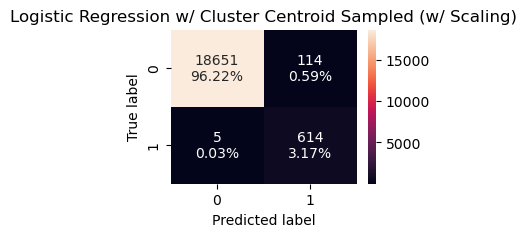

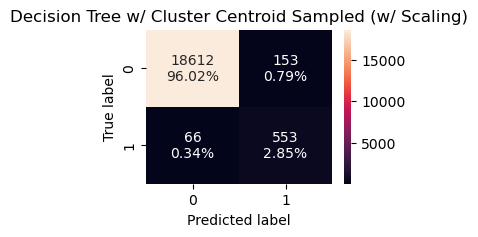

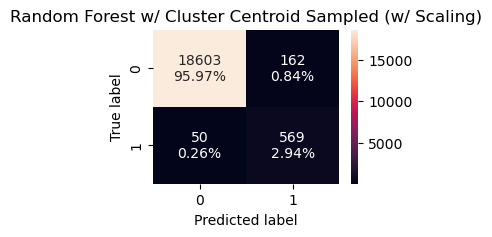

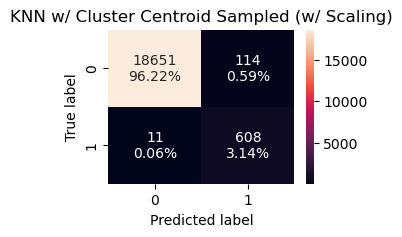

In [298]:
confusion_matrix_sklearn(y_test_srs, logreg_y_pred_clstrcntrd_npa, "Logistic Regression w/ Cluster Centroid Sampled (w/ Scaling)")
#### confusion_matrix_sklearn(y_test_srs, svm_y_pred_clstrcntrd_npa, "SVM w/ Cluster Centroid Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, dectree_y_pred_clstrcntrd_npa, "Decision Tree w/ Cluster Centroid Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, rndfor_y_pred_clstrcntrd_npa, "Random Forest w/ Cluster Centroid Sampled (w/ Scaling)")
confusion_matrix_sklearn(y_test_srs, knn_y_pred_clstrcntrd_npa, "KNN w/ Cluster Centroid Sampled (w/ Scaling)")

In [299]:
# Print the classification report for the Logistics Regression model
logreg_clstrcntrd_class_rpt = classification_report(y_test_srs, logreg_y_pred_clstrcntrd_npa)

#### # Print the classification report for the SVM model
#### svm_clstrcntrd_class_rpt = classification_report(y_test_srs, svm_y_pred_clstrcntrd_npa)

# Print the classification report for the Decision Tree model
dectree_clstrcntrd_class_rpt = classification_report(y_test_srs, dectree_y_pred_clstrcntrd_npa)

# Print the classification report for the Random Forest model
rndfor_clstrcntrd_class_rpt = classification_report(y_test_srs, rndfor_y_pred_clstrcntrd_npa)

# Print the classification report for the KNN model
knn_clstrcntrd_class_rpt = classification_report(y_test_srs, knn_y_pred_clstrcntrd_npa)

In [300]:
print("Logistic Regression (w/ Cluster Centroid Sampled) Classification Repor (w/ Scaling)t:\n", logreg_clstrcntrd_class_rpt)
####print("SVM (ww/ Cluster Centroid Sampled) Classification Report (w/ Scaling):\n", svm_clstrcntrd_class_rpt)
print("Decision Tree (ww/ Cluster Centroid Sampled)g Classification Report (w/ Scaling):\n", dectree_clstrcntrd_class_rpt)
print("Random Forest (ww/ Cluster Centroid Sampled)g Classification Report (w/ Scaling):\n", rndfor_clstrcntrd_class_rpt)
print("KNN (ww/ Cluster Centroid Sampled) Classification Report (w/ Scaling):\n", knn_clstrcntrd_class_rpt)

Logistic Regression (w/ Cluster Centroid Sampled) Classification Repor (w/ Scaling)t:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Decision Tree (ww/ Cluster Centroid Sampled)g Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.78      0.89      0.83       619

    accuracy                           0.99     19384
   macro avg       0.89      0.94      0.91     19384
weighted avg       0.99      0.99      0.99     19384

Random Forest (ww/ Cluster Centroid Sampled)g Classification Report (w/ Scaling):
               precision    recall  f1-score   support

           0       1.00      0.99     

In [301]:
# (Re-)Calculate classificaiton report to output to a dictionary format

# Logistic Regression
logreg_class_rpt_scaled_dict = classification_report(y_test_srs, logreg_y_pred_npa, output_dict = True)
#### svm_class_rpt_scaled_dict = classification_report(y_test_srs, svm_y_pred_npa, output_dict = True)
dectree_class_rpt_scaled_dict = classification_report(y_test_srs, dectree_y_pred_npa, output_dict = True)
rndfor_class_rpt_scaled_dict = classification_report(y_test_srs, rndfor_y_pred_npa, output_dict = True)
knn_class_rpt_scaled_dict = classification_report(y_test_srs, knn_y_pred_npa, output_dict = True)

logreg_rndovr_class_rpt_scaled_dict = classification_report(y_test_srs, logreg_y_pred_rndovr_npa, output_dict = True)
#### svm_rndovr_class_rpt_scaled_dict = classification_report(y_test_srs, svm_y_pred_rndovr_np, output_dict = Truea)
dectree_rndovr_class_rpt_scaled_dict = classification_report(y_test_srs, dectree_y_pred_rndovr_npa, output_dict = True)
rndfor_rndovr_class_rpt_scaled_dict = classification_report(y_test_srs, rndfor_y_pred_rndovr_npa, output_dict = True)
knn_rndovr_class_rpt_scaled_dict = classification_report(y_test_srs, knn_y_pred_rndovr_npa, output_dict = True)

logreg_rndunder_class_rpt_scaled_dict = classification_report(y_test_srs, logreg_y_pred_rndunder_npa, output_dict = True)
#### svm_rndunder_class_rpt_scaled_dict = classification_report(y_test_srs, svm_y_pred_rndunder_npa, output_dict = True)
dectree_rndunder_class_rpt_scaled_dict = classification_report(y_test_srs, dectree_y_pred_rndunder_npa, output_dict = True)
rndfor_rndunder_class_rpt_scaled_dict = classification_report(y_test_srs, rndfor_y_pred_rndunder_npa, output_dict = True)
knn_rndunder_class_rpt_scaled_dict = classification_report(y_test_srs, knn_y_pred_rndunder_npa, output_dict = True)

logreg_smote_class_rpt_scaled_dict = classification_report(y_test_srs, logreg_y_pred_smote_npa, output_dict = True)
#### svm_smote_class_rpt_scaled_dict = classification_report(y_test_srs, svm_y_pred_smote_npa, output_dict = True)
dectree_smote_class_rpt_scaled_dict = classification_report(y_test_srs, dectree_y_pred_smote_npa, output_dict = True)
rndfor_smote_class_rpt_scaled_dict = classification_report(y_test_srs, rndfor_y_pred_smote_npa, output_dict = True)
knn_smote_class_rpt_scaled_dict = classification_report(y_test_srs, knn_y_pred_smote_npa, output_dict = True)

logreg_smoteenn_class_rpt_scaled_dict = classification_report(y_test_srs, logreg_y_pred_smoteenn_npa, output_dict = True)
#### svm_smoteenn_class_rpt_scaled_dict = classification_report(y_test_srs, svm_y_pred_smoteenn_npa, output_dict = True)
dectree_smoteenn_class_rpt_scaled_dict = classification_report(y_test_srs, dectree_y_pred_smoteenn_npa, output_dict = True)
rndfor_smoteenn_class_rpt_scaled_dict = classification_report(y_test_srs, rndfor_y_pred_smoteenn_npa, output_dict = True)
knn_smoteenn_class_rpt_scaled_dict = classification_report(y_test_srs, knn_y_pred_smoteenn_npa, output_dict = True)

logreg_clstrcntrd_class_rpt_scaled_dict = classification_report(y_test_srs, logreg_y_pred_clstrcntrd_npa, output_dict = True)
#### svm_clstrcntrd_class_rpt_scaled_dict = classification_report(y_test_srs, svm_y_pred_clstrcntrd_npa, output_dict = True)
dectree_clstrcntrd_class_rpt_scaled_dict = classification_report(y_test_srs, dectree_y_pred_clstrcntrd_npa, output_dict = True)
rndfor_clstrcntrd_class_rpt_scaled_dict = classification_report(y_test_srs, rndfor_y_pred_clstrcntrd_npa, output_dict = True)
knn_clstrcntrd_class_rpt_scaled_dict = classification_report(y_test_srs, knn_y_pred_clstrcntrd_npa, output_dict = True)

In [302]:
accuracy_npa = np.array([logreg_class_rpt_dict['accuracy'],dectree_class_rpt_dict['accuracy'],rndfor_class_rpt_dict['accuracy'],knn_class_rpt_dict['accuracy'],
                         logreg_rndovr_class_rpt_dict['accuracy'],dectree_rndovr_class_rpt_dict['accuracy'],rndfor_rndovr_class_rpt_dict['accuracy'],knn_rndovr_class_rpt_dict['accuracy'],
                         logreg_rndunder_class_rpt_dict['accuracy'],dectree_rndunder_class_rpt_dict['accuracy'],rndfor_rndunder_class_rpt_dict['accuracy'],knn_rndunder_class_rpt_dict['accuracy'],
                         logreg_smote_class_rpt_dict['accuracy'],dectree_smote_class_rpt_dict['accuracy'],rndfor_smote_class_rpt_dict['accuracy'],knn_smote_class_rpt_dict['accuracy'],
                         logreg_smoteenn_class_rpt_dict['accuracy'],dectree_smoteenn_class_rpt_dict['accuracy'],rndfor_smoteenn_class_rpt_dict['accuracy'],knn_smoteenn_class_rpt_dict['accuracy'],
                         logreg_clstrcntrd_class_rpt_dict['accuracy'],dectree_clstrcntrd_class_rpt_dict['accuracy'],rndfor_clstrcntrd_class_rpt_dict['accuracy'],knn_clstrcntrd_class_rpt_dict['accuracy']
                        ])

precision_0_npa = np.array([logreg_class_rpt_dict['0']['precision'],dectree_class_rpt_dict['0']['precision'],rndfor_class_rpt_dict['0']['precision'],knn_class_rpt_dict['0']['precision'],
                            logreg_rndovr_class_rpt_dict['0']['precision'],dectree_rndovr_class_rpt_dict['0']['precision'],rndfor_rndovr_class_rpt_dict['0']['precision'],knn_rndovr_class_rpt_dict['0']['precision'],
                            logreg_rndunder_class_rpt_dict['0']['precision'],dectree_rndunder_class_rpt_dict['0']['precision'],rndfor_rndunder_class_rpt_dict['0']['precision'],knn_rndunder_class_rpt_dict['0']['precision'],
                            logreg_smote_class_rpt_dict['0']['precision'],dectree_smote_class_rpt_dict['0']['precision'],rndfor_smote_class_rpt_dict['0']['precision'],knn_smote_class_rpt_dict['0']['precision'],
                            logreg_smoteenn_class_rpt_dict['0']['precision'],dectree_smoteenn_class_rpt_dict['0']['precision'],rndfor_smoteenn_class_rpt_dict['0']['precision'],knn_smoteenn_class_rpt_dict['0']['precision'],
                            logreg_clstrcntrd_class_rpt_dict['0']['precision'],dectree_clstrcntrd_class_rpt_dict['0']['precision'],rndfor_clstrcntrd_class_rpt_dict['0']['precision'],knn_clstrcntrd_class_rpt_dict['0']['precision']
                           ])
precision_1_npa = np.array([logreg_class_rpt_dict['1']['precision'],dectree_class_rpt_dict['1']['precision'],rndfor_class_rpt_dict['1']['precision'],knn_class_rpt_dict['1']['precision'],
                            logreg_rndovr_class_rpt_dict['1']['precision'],dectree_rndovr_class_rpt_dict['1']['precision'],rndfor_rndovr_class_rpt_dict['1']['precision'],knn_rndovr_class_rpt_dict['1']['precision'],
                            logreg_rndunder_class_rpt_dict['1']['precision'],dectree_rndunder_class_rpt_dict['1']['precision'],rndfor_rndunder_class_rpt_dict['1']['precision'],knn_rndunder_class_rpt_dict['1']['precision'],
                            logreg_smote_class_rpt_dict['1']['precision'],dectree_smote_class_rpt_dict['1']['precision'],rndfor_smote_class_rpt_dict['1']['precision'],knn_smote_class_rpt_dict['1']['precision'],
                            logreg_smoteenn_class_rpt_dict['1']['precision'],dectree_smoteenn_class_rpt_dict['1']['precision'],rndfor_smoteenn_class_rpt_dict['1']['precision'],knn_smoteenn_class_rpt_dict['1']['precision'],
                            logreg_clstrcntrd_class_rpt_dict['1']['precision'],dectree_clstrcntrd_class_rpt_dict['1']['precision'],rndfor_clstrcntrd_class_rpt_dict['1']['precision'],knn_clstrcntrd_class_rpt_dict['1']['precision']
                           ])

recall_0_npa = np.array([logreg_class_rpt_dict['0']['recall'],dectree_class_rpt_dict['0']['recall'],rndfor_class_rpt_dict['0']['recall'],knn_class_rpt_dict['0']['recall'],
                         logreg_rndovr_class_rpt_dict['0']['recall'],dectree_rndovr_class_rpt_dict['0']['recall'],rndfor_rndovr_class_rpt_dict['0']['recall'],knn_rndovr_class_rpt_dict['0']['recall'],
                         logreg_rndunder_class_rpt_dict['0']['recall'],dectree_rndunder_class_rpt_dict['0']['recall'],rndfor_rndunder_class_rpt_dict['0']['recall'],knn_rndunder_class_rpt_dict['0']['recall'],
                         logreg_smote_class_rpt_dict['0']['recall'],dectree_smote_class_rpt_dict['0']['recall'],rndfor_smote_class_rpt_dict['0']['recall'],knn_smote_class_rpt_dict['0']['recall'],
                         logreg_smoteenn_class_rpt_dict['0']['recall'],dectree_smoteenn_class_rpt_dict['0']['recall'],rndfor_smoteenn_class_rpt_dict['0']['recall'],knn_smoteenn_class_rpt_dict['0']['recall'],
                         logreg_clstrcntrd_class_rpt_dict['0']['recall'],dectree_clstrcntrd_class_rpt_dict['0']['recall'],rndfor_clstrcntrd_class_rpt_dict['0']['recall'],knn_clstrcntrd_class_rpt_dict['0']['recall']
                           ])
recall_1_npa = np.array([logreg_class_rpt_dict['1']['recall'],dectree_class_rpt_dict['1']['recall'],rndfor_class_rpt_dict['1']['recall'],knn_class_rpt_dict['1']['recall'],
                         logreg_rndovr_class_rpt_dict['1']['recall'],dectree_rndovr_class_rpt_dict['1']['recall'],rndfor_rndovr_class_rpt_dict['1']['recall'],knn_rndovr_class_rpt_dict['1']['recall'],
                         logreg_rndunder_class_rpt_dict['1']['recall'],dectree_rndunder_class_rpt_dict['1']['recall'],rndfor_rndunder_class_rpt_dict['1']['recall'],knn_rndunder_class_rpt_dict['1']['recall'],
                         logreg_smote_class_rpt_dict['1']['recall'],dectree_smote_class_rpt_dict['1']['recall'],rndfor_smote_class_rpt_dict['1']['recall'],knn_smote_class_rpt_dict['1']['recall'],
                         logreg_smoteenn_class_rpt_dict['1']['recall'],dectree_smoteenn_class_rpt_dict['1']['recall'],rndfor_smoteenn_class_rpt_dict['1']['recall'],knn_smoteenn_class_rpt_dict['1']['recall'],
                          logreg_clstrcntrd_class_rpt_dict['1']['recall'],dectree_clstrcntrd_class_rpt_dict['1']['recall'],rndfor_clstrcntrd_class_rpt_dict['1']['recall'],knn_clstrcntrd_class_rpt_dict['1']['recall']
                           ])

f1_score_0_npa = np.array([logreg_class_rpt_dict['0']['f1-score'],dectree_class_rpt_dict['0']['f1-score'],rndfor_class_rpt_dict['0']['f1-score'],knn_class_rpt_dict['0']['f1-score'],
                           logreg_rndovr_class_rpt_dict['0']['f1-score'],dectree_rndovr_class_rpt_dict['0']['f1-score'],rndfor_rndovr_class_rpt_dict['0']['f1-score'],knn_rndovr_class_rpt_dict['0']['f1-score'],
                           logreg_rndunder_class_rpt_dict['0']['f1-score'],dectree_rndunder_class_rpt_dict['0']['f1-score'],rndfor_rndunder_class_rpt_dict['0']['f1-score'],knn_rndunder_class_rpt_dict['0']['f1-score'],
                           logreg_smote_class_rpt_dict['0']['f1-score'],dectree_smote_class_rpt_dict['0']['f1-score'],rndfor_smote_class_rpt_dict['0']['f1-score'],knn_smote_class_rpt_dict['0']['f1-score'],
                           logreg_smoteenn_class_rpt_dict['0']['f1-score'],dectree_smoteenn_class_rpt_dict['0']['f1-score'],rndfor_smoteenn_class_rpt_dict['0']['f1-score'],knn_smoteenn_class_rpt_dict['0']['f1-score'],
                           logreg_clstrcntrd_class_rpt_dict['0']['f1-score'],dectree_clstrcntrd_class_rpt_dict['0']['f1-score'],rndfor_clstrcntrd_class_rpt_dict['0']['f1-score'],knn_clstrcntrd_class_rpt_dict['0']['f1-score']
                           ])
f1_score_1_npa = np.array([logreg_class_rpt_dict['1']['f1-score'],dectree_class_rpt_dict['1']['f1-score'],rndfor_class_rpt_dict['1']['f1-score'],knn_class_rpt_dict['1']['f1-score'],
                           logreg_rndovr_class_rpt_dict['1']['f1-score'],dectree_rndovr_class_rpt_dict['1']['f1-score'],rndfor_rndovr_class_rpt_dict['1']['f1-score'],knn_rndovr_class_rpt_dict['1']['f1-score'],
                           logreg_rndunder_class_rpt_dict['1']['f1-score'],dectree_rndunder_class_rpt_dict['1']['f1-score'],rndfor_rndunder_class_rpt_dict['1']['f1-score'],knn_rndunder_class_rpt_dict['1']['f1-score'],
                           logreg_smote_class_rpt_dict['1']['f1-score'],dectree_smote_class_rpt_dict['1']['f1-score'],rndfor_smote_class_rpt_dict['1']['f1-score'],knn_smote_class_rpt_dict['1']['f1-score'],
                           logreg_smoteenn_class_rpt_dict['1']['f1-score'],dectree_smoteenn_class_rpt_dict['1']['f1-score'],rndfor_smoteenn_class_rpt_dict['1']['f1-score'],knn_smoteenn_class_rpt_dict['1']['f1-score'],
                           logreg_clstrcntrd_class_rpt_dict['1']['f1-score'],dectree_clstrcntrd_class_rpt_dict['1']['f1-score'],rndfor_clstrcntrd_class_rpt_dict['1']['f1-score'],knn_clstrcntrd_class_rpt_dict['1']['f1-score']
                           ])



accuracy_scaled_npa = np.array([logreg_class_rpt_scaled_dict['accuracy'],dectree_class_rpt_scaled_dict['accuracy'],rndfor_class_rpt_scaled_dict['accuracy'],knn_class_rpt_scaled_dict['accuracy'],
                         logreg_rndovr_class_rpt_scaled_dict['accuracy'],dectree_rndovr_class_rpt_scaled_dict['accuracy'],rndfor_rndovr_class_rpt_scaled_dict['accuracy'],knn_rndovr_class_rpt_scaled_dict['accuracy'],
                         logreg_rndunder_class_rpt_scaled_dict['accuracy'],dectree_rndunder_class_rpt_scaled_dict['accuracy'],rndfor_rndunder_class_rpt_scaled_dict['accuracy'],knn_rndunder_class_rpt_scaled_dict['accuracy'],
                         logreg_smote_class_rpt_scaled_dict['accuracy'],dectree_smote_class_rpt_scaled_dict['accuracy'],rndfor_smote_class_rpt_scaled_dict['accuracy'],knn_smote_class_rpt_scaled_dict['accuracy'],
                         logreg_smoteenn_class_rpt_scaled_dict['accuracy'],dectree_smoteenn_class_rpt_scaled_dict['accuracy'],rndfor_smoteenn_class_rpt_scaled_dict['accuracy'],knn_smoteenn_class_rpt_scaled_dict['accuracy'],
                         logreg_clstrcntrd_class_rpt_scaled_dict['accuracy'],dectree_clstrcntrd_class_rpt_scaled_dict['accuracy'],rndfor_clstrcntrd_class_rpt_scaled_dict['accuracy'],knn_clstrcntrd_class_rpt_scaled_dict['accuracy']
                        ])

precision_0_scaled_npa = np.array([logreg_class_rpt_scaled_dict['0']['precision'],dectree_class_rpt_scaled_dict['0']['precision'],rndfor_class_rpt_scaled_dict['0']['precision'],knn_class_rpt_scaled_dict['0']['precision'],
                            logreg_rndovr_class_rpt_scaled_dict['0']['precision'],dectree_rndovr_class_rpt_scaled_dict['0']['precision'],rndfor_rndovr_class_rpt_scaled_dict['0']['precision'],knn_rndovr_class_rpt_scaled_dict['0']['precision'],
                            logreg_rndunder_class_rpt_scaled_dict['0']['precision'],dectree_rndunder_class_rpt_scaled_dict['0']['precision'],rndfor_rndunder_class_rpt_scaled_dict['0']['precision'],knn_rndunder_class_rpt_scaled_dict['0']['precision'],
                            logreg_smote_class_rpt_scaled_dict['0']['precision'],dectree_smote_class_rpt_scaled_dict['0']['precision'],rndfor_smote_class_rpt_scaled_dict['0']['precision'],knn_smote_class_rpt_scaled_dict['0']['precision'],
                            logreg_smoteenn_class_rpt_scaled_dict['0']['precision'],dectree_smoteenn_class_rpt_scaled_dict['0']['precision'],rndfor_smoteenn_class_rpt_scaled_dict['0']['precision'],knn_smoteenn_class_rpt_scaled_dict['0']['precision'],
                            logreg_clstrcntrd_class_rpt_scaled_dict['0']['precision'],dectree_clstrcntrd_class_rpt_scaled_dict['0']['precision'],rndfor_clstrcntrd_class_rpt_scaled_dict['0']['precision'],knn_clstrcntrd_class_rpt_scaled_dict['0']['precision']
                           ])
precision_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict['1']['precision'],dectree_class_rpt_scaled_dict['1']['precision'],rndfor_class_rpt_scaled_dict['1']['precision'],knn_class_rpt_scaled_dict['1']['precision'],
                            logreg_rndovr_class_rpt_scaled_dict['1']['precision'],dectree_rndovr_class_rpt_scaled_dict['1']['precision'],rndfor_rndovr_class_rpt_scaled_dict['1']['precision'],knn_rndovr_class_rpt_scaled_dict['1']['precision'],
                            logreg_rndunder_class_rpt_scaled_dict['1']['precision'],dectree_rndunder_class_rpt_scaled_dict['1']['precision'],rndfor_rndunder_class_rpt_scaled_dict['1']['precision'],knn_rndunder_class_rpt_scaled_dict['1']['precision'],
                            logreg_smote_class_rpt_scaled_dict['1']['precision'],dectree_smote_class_rpt_scaled_dict['1']['precision'],rndfor_smote_class_rpt_scaled_dict['1']['precision'],knn_smote_class_rpt_scaled_dict['1']['precision'],
                            logreg_smoteenn_class_rpt_scaled_dict['1']['precision'],dectree_smoteenn_class_rpt_scaled_dict['1']['precision'],rndfor_smoteenn_class_rpt_scaled_dict['1']['precision'],knn_smoteenn_class_rpt_scaled_dict['1']['precision'],
                            logreg_clstrcntrd_class_rpt_scaled_dict['1']['precision'],dectree_clstrcntrd_class_rpt_scaled_dict['1']['precision'],rndfor_clstrcntrd_class_rpt_scaled_dict['1']['precision'],knn_clstrcntrd_class_rpt_scaled_dict['1']['precision']
                           ])

recall_0_scaled_npa = np.array([logreg_class_rpt_scaled_dict['0']['recall'],dectree_class_rpt_scaled_dict['0']['recall'],rndfor_class_rpt_scaled_dict['0']['recall'],knn_class_rpt_scaled_dict['0']['recall'],
                         logreg_rndovr_class_rpt_scaled_dict['0']['recall'],dectree_rndovr_class_rpt_scaled_dict['0']['recall'],rndfor_rndovr_class_rpt_scaled_dict['0']['recall'],knn_rndovr_class_rpt_scaled_dict['0']['recall'],
                         logreg_rndunder_class_rpt_scaled_dict['0']['recall'],dectree_rndunder_class_rpt_scaled_dict['0']['recall'],rndfor_rndunder_class_rpt_scaled_dict['0']['recall'],knn_rndunder_class_rpt_scaled_dict['0']['recall'],
                         logreg_smote_class_rpt_scaled_dict['0']['recall'],dectree_smote_class_rpt_scaled_dict['0']['recall'],rndfor_smote_class_rpt_scaled_dict['0']['recall'],knn_smote_class_rpt_scaled_dict['0']['recall'],
                         logreg_smoteenn_class_rpt_scaled_dict['0']['recall'],dectree_smoteenn_class_rpt_scaled_dict['0']['recall'],rndfor_smoteenn_class_rpt_scaled_dict['0']['recall'],knn_smoteenn_class_rpt_scaled_dict['0']['recall'],
                         logreg_clstrcntrd_class_rpt_scaled_dict['0']['recall'],dectree_clstrcntrd_class_rpt_scaled_dict['0']['recall'],rndfor_clstrcntrd_class_rpt_scaled_dict['0']['recall'],knn_clstrcntrd_class_rpt_scaled_dict['0']['recall']
                           ])
recall_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict['1']['recall'],dectree_class_rpt_scaled_dict['1']['recall'],rndfor_class_rpt_scaled_dict['1']['recall'],knn_class_rpt_scaled_dict['1']['recall'],
                         logreg_rndovr_class_rpt_scaled_dict['1']['recall'],dectree_rndovr_class_rpt_scaled_dict['1']['recall'],rndfor_rndovr_class_rpt_scaled_dict['1']['recall'],knn_rndovr_class_rpt_scaled_dict['1']['recall'],
                         logreg_rndunder_class_rpt_scaled_dict['1']['recall'],dectree_rndunder_class_rpt_scaled_dict['1']['recall'],rndfor_rndunder_class_rpt_scaled_dict['1']['recall'],knn_rndunder_class_rpt_scaled_dict['1']['recall'],
                         logreg_smote_class_rpt_scaled_dict['1']['recall'],dectree_smote_class_rpt_scaled_dict['1']['recall'],rndfor_smote_class_rpt_scaled_dict['1']['recall'],knn_smote_class_rpt_scaled_dict['1']['recall'],
                         logreg_smoteenn_class_rpt_scaled_dict['1']['recall'],dectree_smoteenn_class_rpt_scaled_dict['1']['recall'],rndfor_smoteenn_class_rpt_scaled_dict['1']['recall'],knn_smoteenn_class_rpt_scaled_dict['1']['recall'],
                          logreg_clstrcntrd_class_rpt_scaled_dict['1']['recall'],dectree_clstrcntrd_class_rpt_scaled_dict['1']['recall'],rndfor_clstrcntrd_class_rpt_scaled_dict['1']['recall'],knn_clstrcntrd_class_rpt_scaled_dict['1']['recall']
                           ])

f1_score_0_scaled_npa = np.array([logreg_class_rpt_scaled_dict['0']['f1-score'],dectree_class_rpt_scaled_dict['0']['f1-score'],rndfor_class_rpt_scaled_dict['0']['f1-score'],knn_class_rpt_scaled_dict['0']['f1-score'],
                           logreg_rndovr_class_rpt_scaled_dict['0']['f1-score'],dectree_rndovr_class_rpt_scaled_dict['0']['f1-score'],rndfor_rndovr_class_rpt_scaled_dict['0']['f1-score'],knn_rndovr_class_rpt_scaled_dict['0']['f1-score'],
                           logreg_rndunder_class_rpt_scaled_dict['0']['f1-score'],dectree_rndunder_class_rpt_scaled_dict['0']['f1-score'],rndfor_rndunder_class_rpt_scaled_dict['0']['f1-score'],knn_rndunder_class_rpt_scaled_dict['0']['f1-score'],
                           logreg_smote_class_rpt_scaled_dict['0']['f1-score'],dectree_smote_class_rpt_scaled_dict['0']['f1-score'],rndfor_smote_class_rpt_scaled_dict['0']['f1-score'],knn_smote_class_rpt_scaled_dict['0']['f1-score'],
                           logreg_smoteenn_class_rpt_scaled_dict['0']['f1-score'],dectree_smoteenn_class_rpt_scaled_dict['0']['f1-score'],rndfor_smoteenn_class_rpt_scaled_dict['0']['f1-score'],knn_smoteenn_class_rpt_scaled_dict['0']['f1-score'],
                           logreg_clstrcntrd_class_rpt_scaled_dict['0']['f1-score'],dectree_clstrcntrd_class_rpt_scaled_dict['0']['f1-score'],rndfor_clstrcntrd_class_rpt_scaled_dict['0']['f1-score'],knn_clstrcntrd_class_rpt_scaled_dict['0']['f1-score']
                           ])
f1_score_1_scaled_npa = np.array([logreg_class_rpt_scaled_dict['1']['f1-score'],dectree_class_rpt_scaled_dict['1']['f1-score'],rndfor_class_rpt_scaled_dict['1']['f1-score'],knn_class_rpt_scaled_dict['1']['f1-score'],
                           logreg_rndovr_class_rpt_scaled_dict['1']['f1-score'],dectree_rndovr_class_rpt_scaled_dict['1']['f1-score'],rndfor_rndovr_class_rpt_scaled_dict['1']['f1-score'],knn_rndovr_class_rpt_scaled_dict['1']['f1-score'],
                           logreg_rndunder_class_rpt_scaled_dict['1']['f1-score'],dectree_rndunder_class_rpt_scaled_dict['1']['f1-score'],rndfor_rndunder_class_rpt_scaled_dict['1']['f1-score'],knn_rndunder_class_rpt_scaled_dict['1']['f1-score'],
                           logreg_smote_class_rpt_scaled_dict['1']['f1-score'],dectree_smote_class_rpt_scaled_dict['1']['f1-score'],rndfor_smote_class_rpt_scaled_dict['1']['f1-score'],knn_smote_class_rpt_scaled_dict['1']['f1-score'],
                           logreg_smoteenn_class_rpt_scaled_dict['1']['f1-score'],dectree_smoteenn_class_rpt_scaled_dict['1']['f1-score'],rndfor_smoteenn_class_rpt_scaled_dict['1']['f1-score'],knn_smoteenn_class_rpt_scaled_dict['1']['f1-score'],
                           logreg_clstrcntrd_class_rpt_scaled_dict['1']['f1-score'],dectree_clstrcntrd_class_rpt_scaled_dict['1']['f1-score'],rndfor_clstrcntrd_class_rpt_scaled_dict['1']['f1-score'],knn_clstrcntrd_class_rpt_scaled_dict['1']['f1-score']
                           ])

supervised_learning_summary_df = pd.DataFrame(list(zip(accuracy_npa,accuracy_scaled_npa,precision_0_npa,precision_1_npa,precision_0_scaled_npa,precision_1_scaled_npa,recall_0_npa,recall_1_npa,recall_0_scaled_npa,recall_1_scaled_npa,f1_score_0_npa,f1_score_1_npa,f1_score_0_scaled_npa,f1_score_1_scaled_npa)))

columns = [('Accuracy-unscaled',' '),('Accuracy-scaled',' '),('Precision-unscaled','0'),('Precision-unscaled','1'),('Precision-scaled','0'),('Precision-scaled','1'),('Recall-unscaled','0'),('Recall-unscaled','1'),('Recall-scaled','0'),('Recall-scaled','1'),('F1-Score-unscaled','0'),('F1-Score-unscaled','1'),('F1-Score-scaled','0'),('F1-Score-scaled','1')]
supervised_learning_summary_df.columns = pd.MultiIndex.from_tuples(columns)    

indexes = [('Original','Logistic Regression'),('Original','Decision Tree'),('Original','Random Forest'),('Original','KNN'),
           ('Rand Ovr Sampled','Logistic Regression'),('Rand Ovr Sampled','Decision Tree'),('Rand Ovr Sampled','Random Forest'),('Rand Ovr Sampled','KNN'),
           ('Rand Under Sampled','Logistic Regression'),('Rand Under Sampled','Decision Tree'),('Rand Under Sampled','Random Forest'),('Rand Under Sampled','KNN'),
           ('SMOTE Sampled','Logistic Regression'),('SMOTE Sampled','Decision Tree'),('SMOTE Sampled','Random Forest'),('SMOTE Sampled','KNN'),
           ('SMOTEENN Sampled','Logistic Regression'),('SMOTEENN Sampled','Decision Tree'),('SMOTEENN Sampled','Random Forest'),('SMOTEENN Sampled','KNN'),
           ('Cluster Centroid Sampled','Logistic Regression'),('Cluster Centroid Sampled','Decision Tree'),('Cluster Centroid Sampled','Random Forest'),('Cluster Centroid Sampled','KNN')
          ]
supervised_learning_summary_df.index = pd.MultiIndex.from_tuples(indexes)       

display(supervised_learning_summary_df)

Accuracy-unscaled  \
                                                                 
Original                 Logistic Regression          0.991849   
                         Decision Tree                0.990250   
                         Random Forest                0.991488   
                         KNN                          0.992210   
Rand Ovr Sampled         Logistic Regression          0.993809   
                         Decision Tree                0.991024   
                         Random Forest                0.991024   
                         KNN                          0.993190   
Rand Under Sampled       Logistic Regression          0.993809   
                         Decision Tree                0.991127   
                         Random Forest                0.989992   
                         KNN                          0.993345   
SMOTE Sampled            Logistic Regression          0.993809   
                         Decision Tree                0.990817   
                         Random Forest                0.991952   
                         KNN                          0.992778   
SMOTEENN Sampled         Logistic Regression          0.993500   
                         Decision Tree                0.993706   
                         Random Forest                0.993706   
                         KNN                          0.993603   
Cluster Centroid Sampled Logistic Regression          0.993603   
                         Decision Tree                0.990095   
                         Random Forest                0.990611   
                         KNN                          0.993500   

                                             Accuracy-scaled  \
                                                               
Original                 Logistic Regression        0.993655   
                         Decision Tree              0.990250   
                         Random Forest              0.991488   
                         KNN                        0.992158   
Rand Ovr Sampled         Logistic Regression        0.993345   
                         Decision Tree              0.990972   
                         Random Forest              0.991075   
                         KNN                        0.993293   
Rand Under Sampled       Logistic Regression        0.993500   
                         Decision Tree              0.991127   
                         Random Forest              0.989992   
                         KNN                        0.992881   
SMOTE Sampled            Logistic Regression        0.993242   
                         Decision Tree              0.991024   
                         Random Forest              0.991952   
                         KNN                        0.993397   
SMOTEENN Sampled         Logistic Regression        0.993345   
                         Decision Tree              0.993809   
                         Random Forest              0.993809   
                         KNN                        0.993809   
Cluster Centroid Sampled Logistic Regression        0.993861   
                         Decision Tree              0.988702   
                         Random Forest              0.989063   
                         KNN                        0.993551   

                                             Precision-unscaled            \
                                                              0         1   
Original                 Logistic Regression           0.997008  0.846617   
                         Decision Tree                 0.995149  0.843450   
                         Random Forest                 0.996477  0.848160   
                         KNN                           0.997647  0.843109   
Rand Ovr Sampled         Logistic Regression           0.999786  0.841313   
                         Decision Tree                 0.996900  0.828656   
                         Random Forest         

In [303]:
# Accuracy Comparison DataFrame

accuracy_df = supervised_learning_summary_df[['Accuracy-unscaled','Accuracy-scaled']]
accuracy_df.columns = [['Accuracy-unscaled','Accuracy-scaled']]
accuracy_unstack_df = accuracy_df.unstack()

print("Accuracy for different ML Models / Scaling / Sampling:")
display(accuracy_unstack_df) 

Accuracy for different ML Models / Scaling / Sampling:


Accuracy-unscaled                                \
                             Decision Tree       KNN Logistic Regression   
Cluster Centroid Sampled          0.990095  0.993500            0.993603   
Original                          0.990250  0.992210            0.991849   
Rand Ovr Sampled                  0.991024  0.993190            0.993809   
Rand Under Sampled                0.991127  0.993345            0.993809   
SMOTE Sampled                     0.990817  0.992778            0.993809   
SMOTEENN Sampled                  0.993706  0.993603            0.993500   

                                       Accuracy-scaled            \
                         Random Forest   Decision Tree       KNN   
Cluster Centroid Sampled      0.990611        0.988702  0.993551   
Original                      0.991488        0.990250  0.992158   
Rand Ovr Sampled              0.991024        0.990972  0.993293   
Rand Under Sampled            0.989992        0.991127  0.992881   
SMOTE Sampled                 0.991952        0.991024  0.993397   
SMOTEENN Sampled              0.993706        0.993809  0.993809   

                                                            
                         Logistic Regression Random Forest  
Cluster Centroid Sampled            0.993861      0.989063  
Original                            0.993655      0.991488  
Rand Ovr Sampled                    0.993345      0.991075  
Rand Under Sampled                  0.993500      0.989992  
SMOTE Sampled                       0.993242      0.991952  
SMOTEENN Sampled                    0.993345      0.993809

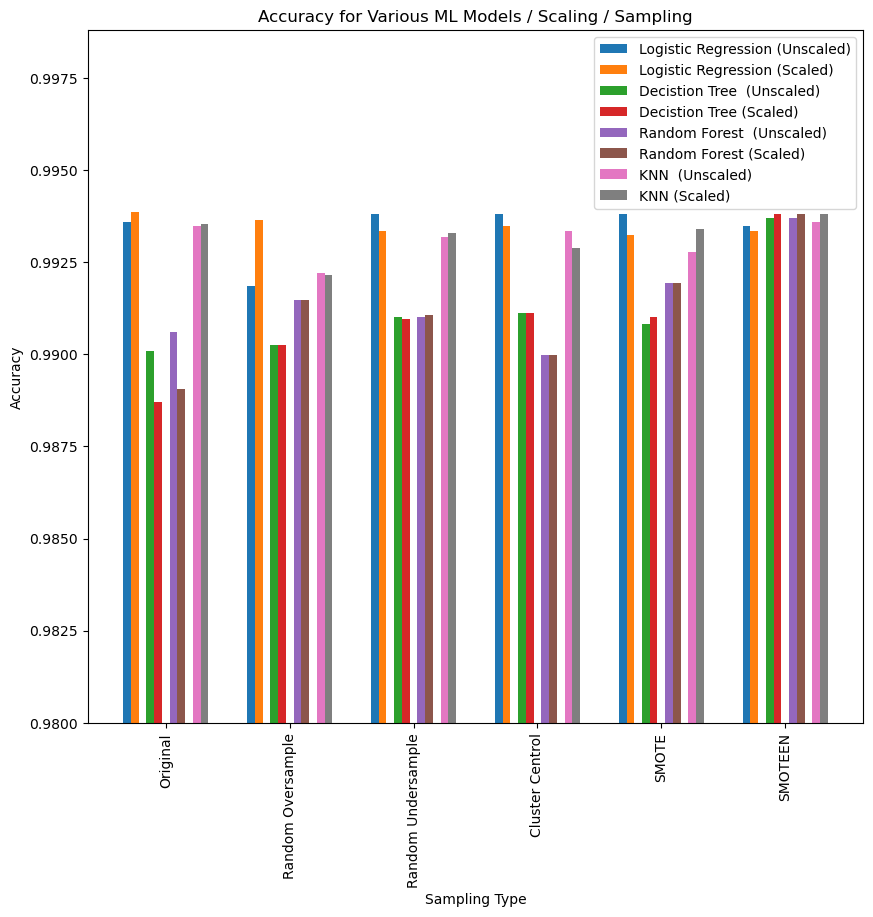

In [304]:
# Accuracy Comparison Barplot

X = ['Original','Random Oversample','Random Undersample','Cluster Centrol', 'SMOTE','SMOTEEN',]

logreg_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Logistic Regression'])
dectree_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Decision Tree'])
rndfor_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['Random Forest'])
knn_npa = np.array(accuracy_unstack_df['Accuracy-unscaled']['KNN'])

logreg_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Logistic Regression'])
dectree_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Decision Tree'])
rndfor_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['Random Forest'])
knn_scaled_npa = np.array(accuracy_unstack_df['Accuracy-scaled']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Accuracy-unscaled',' ')]) + .005
min_y_lim = min(supervised_learning_summary_df[('Accuracy-unscaled',' ')]) - .01
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Sampling Type")
plt.ylabel("Accuracy")
plt.title("Accuracy for Various ML Models / Scaling / Sampling")
plt.legend()

plt.show()

In [305]:
# Precision (Value=0) Comparison DataFrame 

precision_0_df = supervised_learning_summary_df[[('Precision-unscaled','0'),('Precision-scaled','0')]]
precision_0_df.columns = [['Precision-unscaled-0','Precision-scaled-0']]
precision_0_unstack_df = precision_0_df.unstack()

print("Precision/0 for different ML Models / Scaling / Sampling:")
display(precision_0_unstack_df) 

Precision/0 for different ML Models / Scaling / Sampling:


Precision-unscaled-0                                \
                                Decision Tree       KNN Logistic Regression   
Cluster Centroid Sampled             0.996525  0.999411            0.999411   
Original                             0.995149  0.997647            0.997008   
Rand Ovr Sampled                     0.996900  0.998929            0.999786   
Rand Under Sampled                   0.999678  0.999785            0.999786   
SMOTE Sampled                        0.996156  0.999089            0.999786   
SMOTEENN Sampled                     0.999786  0.999786            0.999785   

                                       Precision-scaled-0            \
                         Random Forest      Decision Tree       KNN   
Cluster Centroid Sampled      0.997537           0.996466  0.999411   
Original                      0.996477           0.995149  0.997594   
Rand Ovr Sampled              0.996900           0.996846  0.998929   
Rand Under Sampled            0.999677           0.999678  0.999785   
SMOTE Sampled                 0.997487           0.996316  0.999303   
SMOTEENN Sampled              0.999786           0.999786  0.999786   

                                                            
                         Logistic Regression Random Forest  
Cluster Centroid Sampled            0.999732      0.997319  
Original                            0.999464      0.996477  
Rand Ovr Sampled                    0.999785      0.996953  
Rand Under Sampled                  0.999785      0.999677  
SMOTE Sampled                       0.999785      0.997381  
SMOTEENN Sampled                    0.999785      0.999786

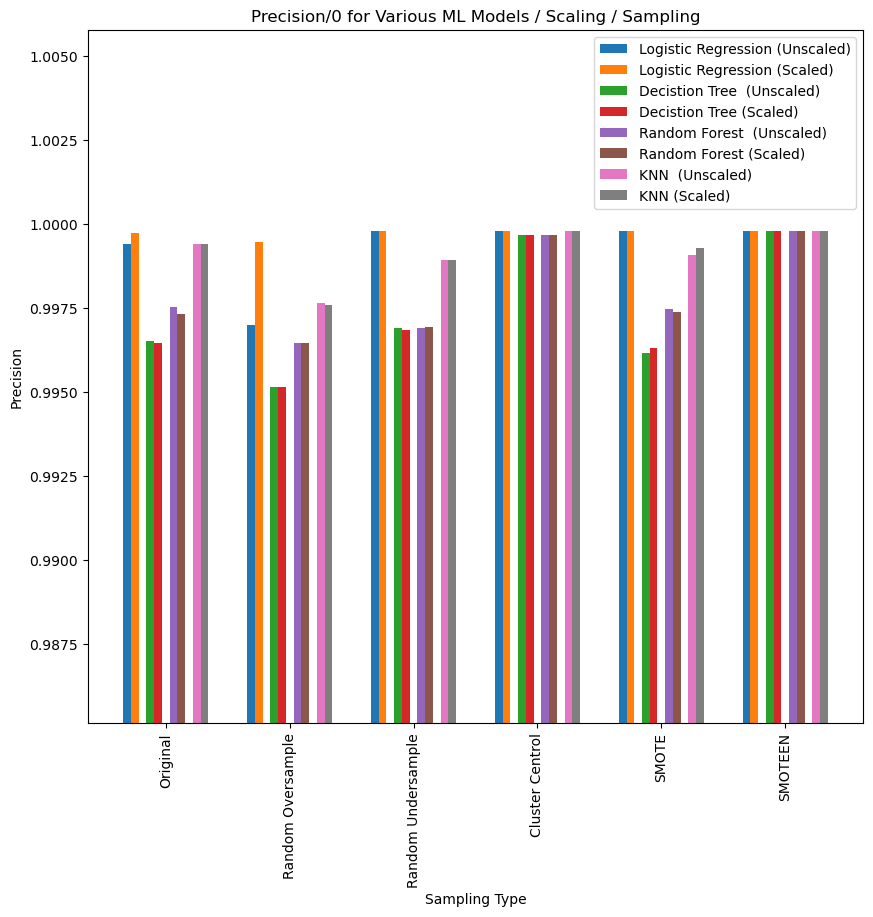

In [306]:
# Precision (Value=0) Comparison Barplot

X = ['Original','Random Oversample','Random Undersample','Cluster Centrol', 'SMOTE','SMOTEEN',]

logreg_npa = np.array(precision_0_unstack_df['Precision-unscaled-0']['Logistic Regression'])
dectree_npa = np.array(precision_0_unstack_df['Precision-unscaled-0']['Decision Tree'])
rndfor_npa = np.array(precision_0_unstack_df['Precision-unscaled-0']['Random Forest'])
knn_npa = np.array(precision_0_unstack_df['Precision-unscaled-0']['KNN'])

logreg_scaled_npa = np.array(precision_0_unstack_df['Precision-scaled-0']['Logistic Regression'])
dectree_scaled_npa = np.array(precision_0_unstack_df['Precision-scaled-0']['Decision Tree'])
rndfor_scaled_npa = np.array(precision_0_unstack_df['Precision-scaled-0']['Random Forest'])
knn_scaled_npa = np.array(precision_0_unstack_df['Precision-scaled-0']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Precision-unscaled','0')]) + .006
min_y_lim = min(supervised_learning_summary_df[('Precision-unscaled','0')]) - .01
plt.ylim(min_y_lim, max_y_lim)
plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Sampling Type")
plt.ylabel("Precision")
plt.title("Precision/0 for Various ML Models / Scaling / Sampling")
plt.legend()

plt.show()

In [307]:
# Precision (Value=1) Comparison DataFrame 

precision_1_df = supervised_learning_summary_df[[('Precision-unscaled','1'),('Precision-scaled','1')]]
precision_1_df.columns = [['Precision-unscaled-1','Precision-scaled-1']]
precision_1_unstack_df = precision_1_df.unstack()

print("Precision/1 for different ML Models / Scaling / Sampling:")
display(precision_1_unstack_df) 

Precision/1 for different ML Models / Scaling / Sampling:


Precision-unscaled-1                                \
                                Decision Tree       KNN Logistic Regression   
Cluster Centroid Sampled             0.813510  0.840941            0.843273   
Original                             0.843450  0.843109            0.846617   
Rand Ovr Sampled                     0.828656  0.842475            0.841313   
Rand Under Sampled                   0.786906  0.831081            0.841313   
SMOTE Sampled                        0.837672  0.830345            0.841313   
SMOTEENN Sampled                     0.839018  0.836735            0.834464   

                                       Precision-scaled-1            \
                         Random Forest      Decision Tree       KNN   
Cluster Centroid Sampled      0.808181           0.783286  0.842105   
Original                      0.848160           0.843450  0.842878   
Rand Ovr Sampled              0.828656           0.828402  0.844852   
Rand Under Sampled            0.765293           0.786906  0.821095   
SMOTE Sampled                 0.839941           0.839695  0.840499   
SMOTEENN Sampled              0.839018           0.841313  0.841313   

                                                            
                         Logistic Regression Random Forest  
Cluster Centroid Sampled            0.843407      0.778386  
Original                            0.843490      0.848160  
Rand Ovr Sampled                    0.831081      0.828909  
Rand Under Sampled                  0.834464      0.765293  
SMOTE Sampled                       0.828841      0.841950  
SMOTEENN Sampled                    0.831081      0.841313

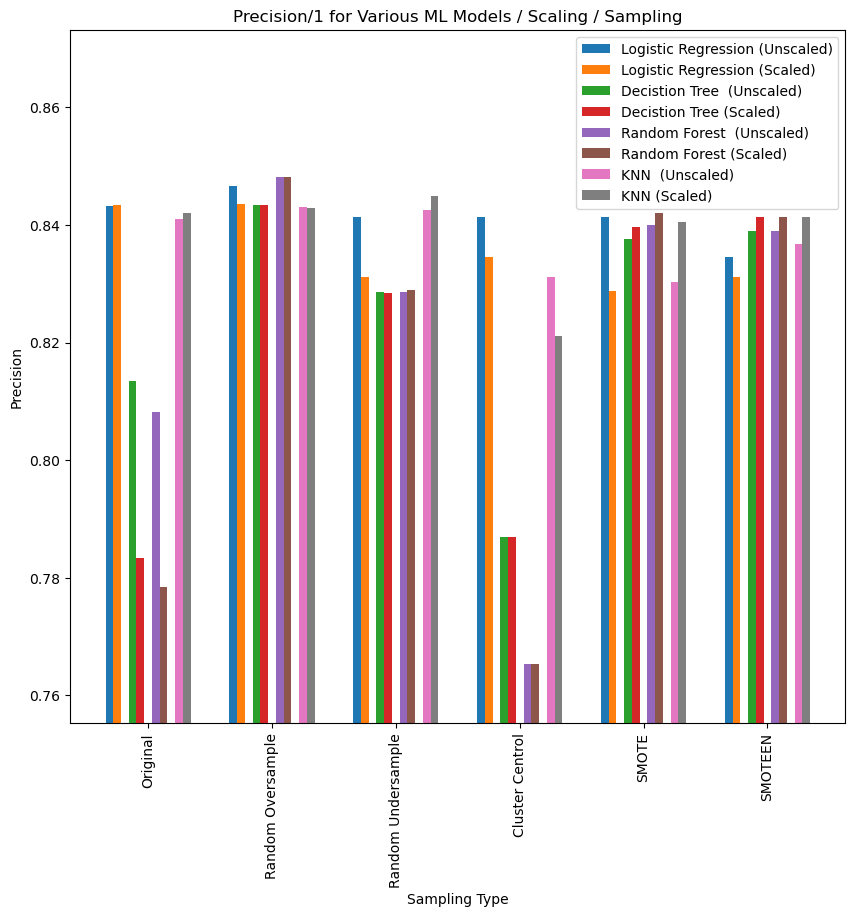

In [308]:
# Precision (Value=1) Comparison Barplot

X = ['Original','Random Oversample','Random Undersample','Cluster Centrol', 'SMOTE','SMOTEEN',]

logreg_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['Random Forest'])
knn_npa = np.array(precision_1_unstack_df['Precision-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(precision_1_unstack_df['Precision-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Precision-unscaled','1')]) + .025
min_y_lim = min(supervised_learning_summary_df[('Precision-unscaled','1')]) - .01
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Sampling Type")
plt.ylabel("Precision")
plt.title("Precision/1 for Various ML Models / Scaling / Sampling")
plt.legend()

plt.show()

In [309]:
# Recall (Value=0) Comparison DataFrame 

recall_0_df = supervised_learning_summary_df[[('Recall-unscaled','0'),('Recall-scaled','0')]]
recall_0_df.columns = [['Recall-unscaled-0','Recall-scaled-0']]
recall_0_unstack_df = recall_0_df.unstack()

print("Recall/0 for different ML Models / Scaling / Sampling:")
display(recall_0_unstack_df) 

Recall/0 for different ML Models / Scaling / Sampling:


Recall-unscaled-0                                \
                             Decision Tree       KNN Logistic Regression   
Cluster Centroid Sampled          0.993232  0.993872            0.993978   
Original                          0.994778  0.994298            0.994564   
Rand Ovr Sampled                  0.993818  0.994031            0.993818   
Rand Under Sampled                0.991154  0.993339            0.993818   
SMOTE Sampled                     0.994351  0.993445            0.993818   
SMOTEENN Sampled                  0.993712  0.993605            0.993499   

                                       Recall-scaled-0            \
                         Random Forest   Decision Tree       KNN   
Cluster Centroid Sampled      0.992752        0.991847  0.993925   
Original                      0.994724        0.994778  0.994298   
Rand Ovr Sampled              0.993818        0.993818  0.994138   
Rand Under Sampled            0.989981        0.991154  0.992859   
SMOTE Sampled                 0.994191        0.994404  0.993872   
SMOTEENN Sampled              0.993712        0.993818  0.993818   

                                                            
                         Logistic Regression Random Forest  
Cluster Centroid Sampled            0.993925      0.991367  
Original                            0.993978      0.994724  
Rand Ovr Sampled                    0.993339      0.993818  
Rand Under Sampled                  0.993499      0.989981  
SMOTE Sampled                       0.993232      0.994298  
SMOTEENN Sampled                    0.993339      0.993818

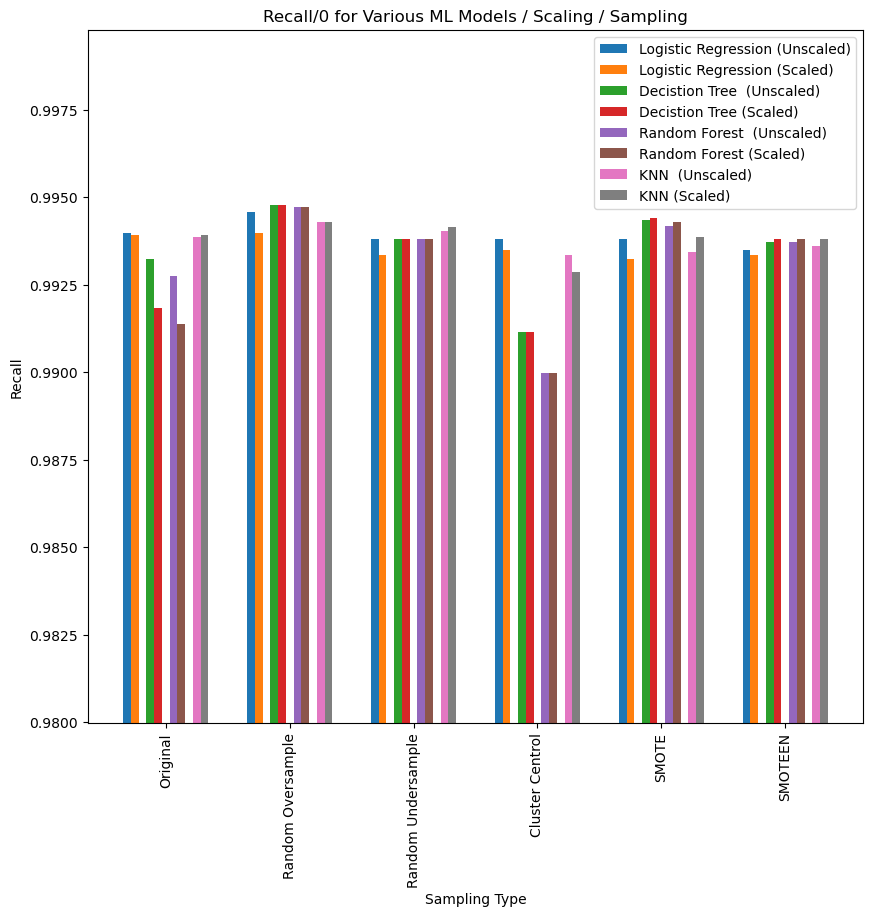

In [310]:
# Recall (Value=0) Comparison Barplot

X = ['Original','Random Oversample','Random Undersample','Cluster Centrol', 'SMOTE','SMOTEEN',]

logreg_npa = np.array(recall_0_unstack_df['Recall-unscaled-0']['Logistic Regression'])
dectree_npa = np.array(recall_0_unstack_df['Recall-unscaled-0']['Decision Tree'])
rndfor_npa = np.array(recall_0_unstack_df['Recall-unscaled-0']['Random Forest'])
knn_npa = np.array(recall_0_unstack_df['Recall-unscaled-0']['KNN'])

logreg_scaled_npa = np.array(recall_0_unstack_df['Recall-scaled-0']['Logistic Regression'])
dectree_scaled_npa = np.array(recall_0_unstack_df['Recall-scaled-0']['Decision Tree'])
rndfor_scaled_npa = np.array(recall_0_unstack_df['Recall-scaled-0']['Random Forest'])
knn_scaled_npa = np.array(recall_0_unstack_df['Recall-scaled-0']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Recall-unscaled','0')]) + .005
min_y_lim = min(supervised_learning_summary_df[('Recall-unscaled','0')]) - .01
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Sampling Type")
plt.ylabel("Recall")
plt.title("Recall/0 for Various ML Models / Scaling / Sampling")
plt.legend()

plt.show()

In [311]:
# Recall (Value=1) Comparison DataFrame 

recall_1_df = supervised_learning_summary_df[[('Recall-unscaled','1'),('Recall-scaled','1')]]
recall_1_df.columns = [['Recall-unscaled-1','Recall-scaled-1']]
recall_1_unstack_df = recall_1_df.unstack()

print("Recall/1 for different ML Models / Scaling / Sampling:")
display(recall_1_unstack_df) 

Recall/1 for different ML Models / Scaling / Sampling:


Recall-unscaled-1                                \
                             Decision Tree       KNN Logistic Regression   
Cluster Centroid Sampled          0.894992  0.982229            0.982229   
Original                          0.852989  0.928918            0.909532   
Rand Ovr Sampled                  0.906300  0.967690            0.993538   
Rand Under Sampled                0.990307  0.993538            0.993538   
SMOTE Sampled                     0.883683  0.972536            0.993538   
SMOTEENN Sampled                  0.993538  0.993538            0.993538   

                                       Recall-scaled-1            \
                         Random Forest   Decision Tree       KNN   
Cluster Centroid Sampled      0.925687        0.893376  0.982229   
Original                      0.893376        0.852989  0.927302   
Rand Ovr Sampled              0.906300        0.904685  0.967690   
Rand Under Sampled            0.990307        0.990307  0.993538   
SMOTE Sampled                 0.924071        0.888530  0.978998   
SMOTEENN Sampled              0.993538        0.993538  0.993538   

                                                            
                         Logistic Regression Random Forest  
Cluster Centroid Sampled            0.991922      0.919225  
Original                            0.983845      0.893376  
Rand Ovr Sampled                    0.993538      0.907916  
Rand Under Sampled                  0.993538      0.990307  
SMOTE Sampled                       0.993538      0.920840  
SMOTEENN Sampled                    0.993538      0.993538

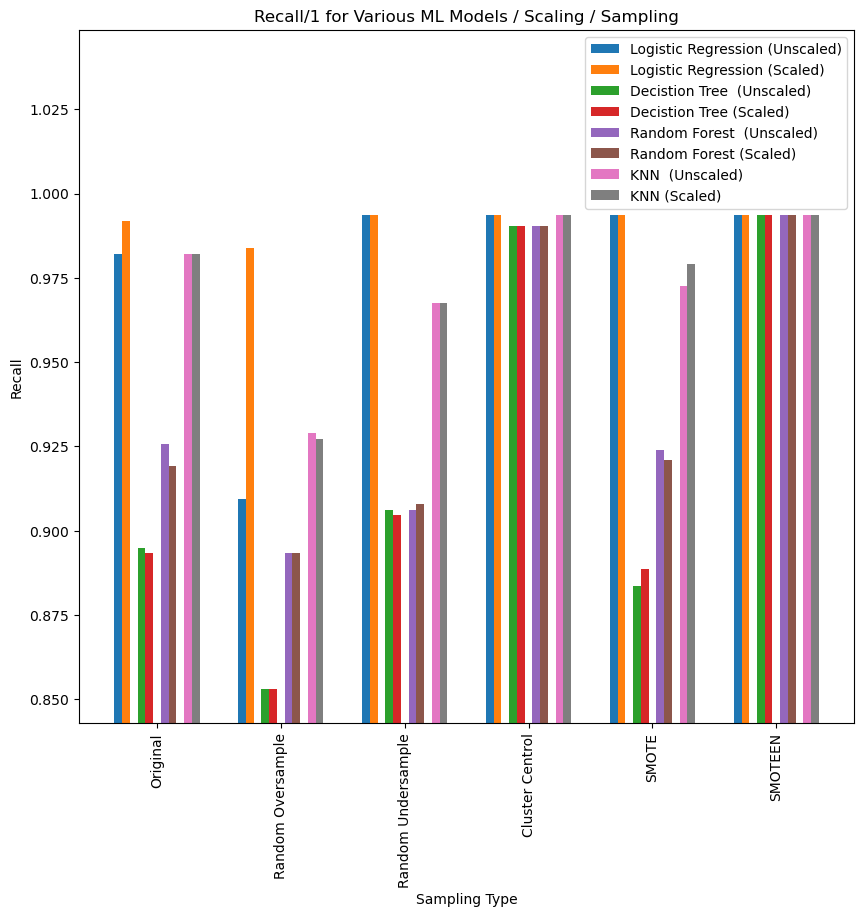

In [312]:
# Recall (Value=1) Comparison Barplot

X = ['Original','Random Oversample','Random Undersample','Cluster Centrol', 'SMOTE','SMOTEEN',]

logreg_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['Random Forest'])
knn_npa = np.array(recall_1_unstack_df['Recall-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(recall_1_unstack_df['Recall-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('Recall-unscaled','1')]) + .055
min_y_lim = min(supervised_learning_summary_df[('Recall-unscaled','1')]) - .01
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Sampling Type")
plt.ylabel("Recall")
plt.title("Recall/1 for Various ML Models / Scaling / Sampling")
plt.legend()

plt.show()

In [313]:
# F1-Score (Value=0) Comparison DataFrame 

f1_score_0_df = supervised_learning_summary_df[[('F1-Score-unscaled','0'),('F1-Score-scaled','0')]]
f1_score_0_df.columns = [['F1-Score-unscaled-0','F1-Score-scaled-0']]
f1_score_0_unstack_df = f1_score_0_df.unstack()

print("F1-Score/0 for different ML Models / Scaling / Sampling:")
display(f1_score_0_unstack_df) 

F1-Score/0 for different ML Models / Scaling / Sampling:


F1-Score-unscaled-0                                \
                               Decision Tree       KNN Logistic Regression   
Cluster Centroid Sampled            0.994876  0.996633            0.996687   
Original                            0.994963  0.995970            0.995785   
Rand Ovr Sampled                    0.995357  0.996474            0.996793   
Rand Under Sampled                  0.995397  0.996552            0.996793   
SMOTE Sampled                       0.995253  0.996259            0.996793   
SMOTEENN Sampled                    0.996739  0.996686            0.996632   

                                       F1-Score-scaled-0            \
                         Random Forest     Decision Tree       KNN   
Cluster Centroid Sampled      0.995139          0.994151  0.996660   
Original                      0.995600          0.994963  0.995943   
Rand Ovr Sampled              0.995357          0.995330  0.996528   
Rand Under Sampled            0.994806          0.995397  0.996310   
SMOTE Sampled                 0.995836          0.995359  0.996580   
SMOTEENN Sampled              0.996739          0.996793  0.996793   

                                                            
                         Logistic Regression Random Forest  
Cluster Centroid Sampled            0.996820      0.994334  
Original                            0.996714      0.995600  
Rand Ovr Sampled                    0.996552      0.995383  
Rand Under Sampled                  0.996632      0.994806  
SMOTE Sampled                       0.996498      0.995837  
SMOTEENN Sampled                    0.996552      0.996793

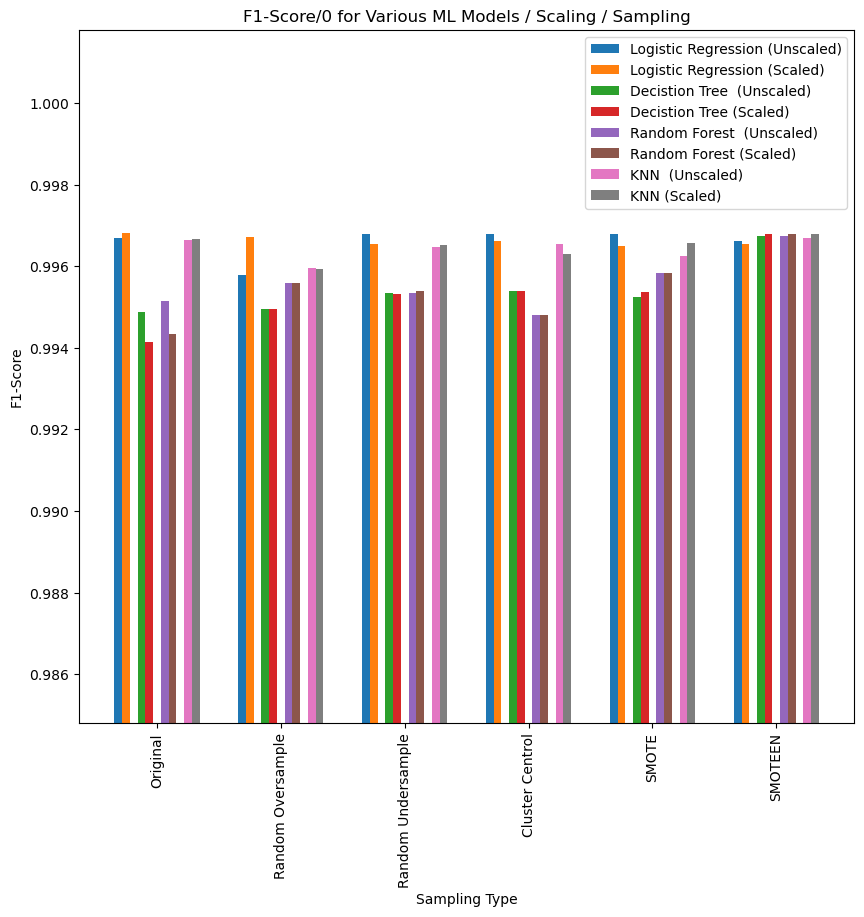

In [314]:
# F1-Score (Value=0) Comparison Barplot

X = ['Original','Random Oversample','Random Undersample','Cluster Centrol', 'SMOTE','SMOTEEN',]

logreg_npa = np.array(f1_score_0_unstack_df['F1-Score-unscaled-0']['Logistic Regression'])
dectree_npa = np.array(f1_score_0_unstack_df['F1-Score-unscaled-0']['Decision Tree'])
rndfor_npa = np.array(f1_score_0_unstack_df['F1-Score-unscaled-0']['Random Forest'])
knn_npa = np.array(f1_score_0_unstack_df['F1-Score-unscaled-0']['KNN'])

logreg_scaled_npa = np.array(f1_score_0_unstack_df['F1-Score-scaled-0']['Logistic Regression'])
dectree_scaled_npa = np.array(f1_score_0_unstack_df['F1-Score-scaled-0']['Decision Tree'])
rndfor_scaled_npa = np.array(f1_score_0_unstack_df['F1-Score-scaled-0']['Random Forest'])
knn_scaled_npa = np.array(f1_score_0_unstack_df['F1-Score-scaled-0']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('F1-Score-unscaled','0')]) + .005
min_y_lim = min(supervised_learning_summary_df[('F1-Score-unscaled','0')]) - .01
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Sampling Type")
plt.ylabel("F1-Score")
plt.title("F1-Score/0 for Various ML Models / Scaling / Sampling")
plt.legend()

plt.show()

In [315]:
# F1-Score (Value=1) Comparison DataFrame 

f1_score_1_df = supervised_learning_summary_df[[('F1-Score-unscaled','1'),('F1-Score-scaled','1')]]
f1_score_1_df.columns = [['F1-Score-unscaled-1','F1-Score-scaled-1']]
f1_score_1_unstack_df = f1_score_1_df.unstack()

print("F1-Score/1 for different ML Models / Scaling / Sampling:")
display(f1_score_1_unstack_df)  

F1-Score/1 for different ML Models / Scaling / Sampling:


F1-Score-unscaled-1                                \
                               Decision Tree       KNN Logistic Regression   
Cluster Centroid Sampled            0.852308  0.906110            0.907463   
Original                            0.848193  0.883935            0.876947   
Rand Ovr Sampled                    0.865741  0.900752            0.911111   
Rand Under Sampled                  0.876967  0.905077            0.911111   
SMOTE Sampled                       0.860063  0.895833            0.911111   
SMOTEENN Sampled                    0.909763  0.908419            0.907080   

                                       F1-Score-scaled-1            \
                         Random Forest     Decision Tree       KNN   
Cluster Centroid Sampled      0.862952          0.834717  0.906786   
Original                      0.870181          0.848193  0.883077   
Rand Ovr Sampled              0.865741          0.864865  0.902108   
Rand Under Sampled            0.863380          0.876967  0.899123   
SMOTE Sampled                 0.880000          0.863422  0.904478   
SMOTEENN Sampled              0.909763          0.911111  0.911111   

                                                            
                         Logistic Regression Random Forest  
Cluster Centroid Sampled            0.911656      0.842963  
Original                            0.908277      0.870181  
Rand Ovr Sampled                    0.905077      0.866615  
Rand Under Sampled                  0.907080      0.863380  
SMOTE Sampled                       0.903747      0.879630  
SMOTEENN Sampled                    0.905077      0.911111

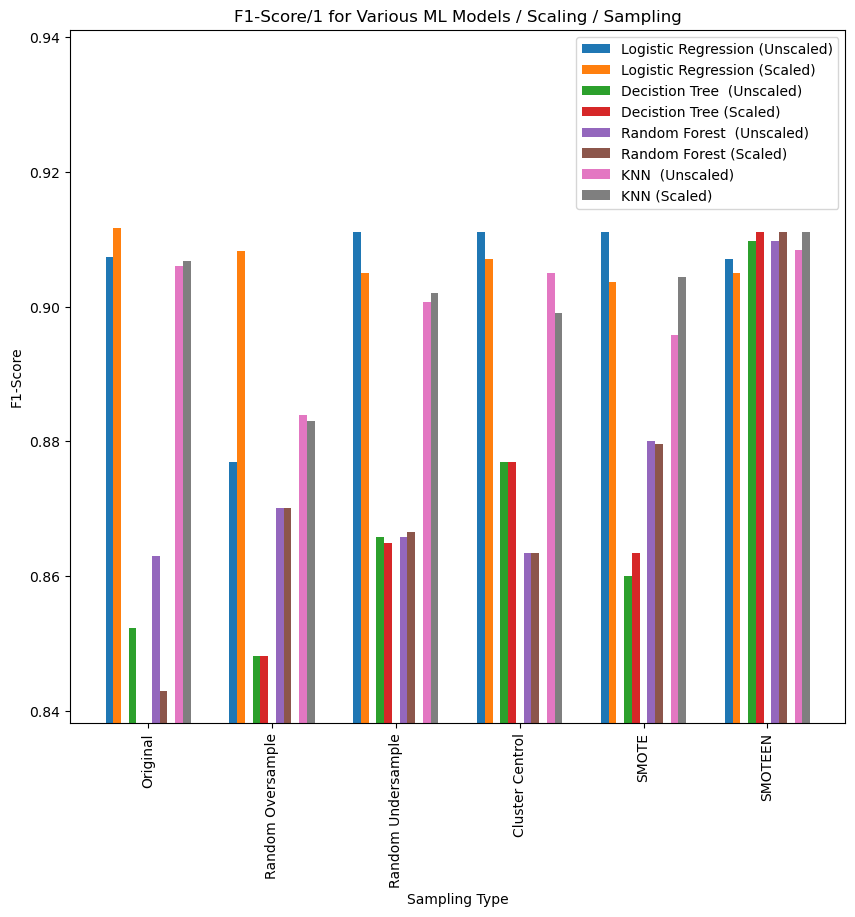

In [316]:
# F1-Score (Value=1) Comparison Barplot

X = ['Original','Random Oversample','Random Undersample','Cluster Centrol', 'SMOTE','SMOTEEN',]

logreg_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['Logistic Regression'])
dectree_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['Decision Tree'])
rndfor_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['Random Forest'])
knn_npa = np.array(f1_score_1_unstack_df['F1-Score-unscaled-1']['KNN'])

logreg_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['Logistic Regression'])
dectree_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['Decision Tree'])
rndfor_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['Random Forest'])
knn_scaled_npa = np.array(f1_score_1_unstack_df['F1-Score-scaled-1']['KNN'])

plt.figure(figsize=(10, 9))

X_axis = np.arange(len(X))
  
sep = 1/16
plt.bar(X_axis - 5*sep, logreg_npa, sep, label = "Logistic Regression (Unscaled)")
plt.bar(X_axis - 4*sep, logreg_scaled_npa, sep, label = "Logistic Regression (Scaled)")
plt.bar(X_axis - 2*sep, dectree_npa, sep, label = "Decistion Tree  (Unscaled)")
plt.bar(X_axis - 1*sep, dectree_scaled_npa, sep, label = "Decistion Tree (Scaled)")
plt.bar(X_axis + 1*sep, rndfor_npa, sep, label = "Random Forest  (Unscaled)")
plt.bar(X_axis + 2*sep, rndfor_scaled_npa, sep, label = "Random Forest (Scaled)")
plt.bar(X_axis + 4*sep, knn_npa, sep, label = "KNN  (Unscaled)")
plt.bar(X_axis + 5*sep, knn_scaled_npa, sep, label = "KNN (Scaled)")

max_y_lim = max(supervised_learning_summary_df[('F1-Score-unscaled','1')]) + .03
min_y_lim = min(supervised_learning_summary_df[('F1-Score-unscaled','1')]) - .01
plt.ylim(min_y_lim, max_y_lim)

plt.xticks(X_axis, X, rotation = 90)
plt.xlabel("Sampling Type")
plt.ylabel("F1-Score")
plt.title("F1-Score/1 for Various ML Models / Scaling / Sampling")
plt.legend()

plt.show()